# **Этап 1**

## **EDA**

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.target_encoder import TargetEncoder
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.pipeline import Pipeline

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [ ]:
!pip install gdown -q

import gdown
import pandas as pd

file_id = "1I5OwTHwl6ESuW1xoL0q1BNOAC_hojyxq"
url = f"https://drive.google.com/uc?id={file_id}"
output = "LengthOfStay.csv"
gdown.download(url, output, quiet=False)
df = pd.read_csv(output)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1I5OwTHwl6ESuW1xoL0q1BNOAC_hojyxq
To: /content/LengthOfStay.csv
100%|██████████| 12.4M/12.4M [00:00<00:00, 34.3MB/s]


eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0            12.0    1.390722  30.432418     96          6.5   
1             8.0    0.943164  28.460516     61          6.5   
2            12.0    1.065750  28.843812     64          6.5   
3            12.0    0.906862  27.959007     76          6.5   
4            11.5    1.242854  30.258927     67          5.6   

   secondarydiagnosisnonicd9  discharged  facid  lengthofstay  
0                          4    9/1/2012      B             3  
1                          1    6/2/2012      A             7  
2                          2   9/25/2012      B             3  
3                          1   8/10/2012      A             1  
4                          2  12/24/2012      E             4  

[5 rows x 28 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

eid - episode ID: Идентификатор эпизода, уникальный идентификатор для каждой записи пациента.

vdate - Visit Date: Дата посещения пациента.

rcount - Readmission Count: Количество повторных госпитализаций.

gender - Gender: Пол пациента.

dialysisrenalendstage - Dialysis indicator: Показатель наличия диализа (есть/нет).

asthma - Asthma indicator: Признак астмы (есть/нет).

irondef - Iron deficiency: Признак дефицита железа (есть/нет).

pneum - Pneumonia: Признак пневмонии (есть/нет).

substancedependence - Substance dependency: Признак зависимости от веществ (есть/нет).

psychologicaldisordermajor - Psychological disorder: Признак психологического расстройства (есть/нет).

depress - Depression: Признак депрессии (есть/нет).

psychother - Other psychological disorders: Признак других психических расстройств (есть/нет).

fibrosisandother - Fibrosis: Признак фиброза (есть/нет).

malnutrition - Malnutrition: Признак недостаточности питания (есть/нет).

hemo - Hemo: Признак гемоглобина (есть повышенный/нет).

hematocrit - Hematocrit levels: Уровень гематокрита в крови.

neutrophils - White blood cells: Уровень белых кровяных клеток.

sodium - Sodium level: Уровень натрия в крови.

glucose - Glucose levels: Уровень глюкозы в крови.

bloodureanitro - Blood Urea Nitrogen: Уровень азота мочевины в крови.

creatinine - Creatinine: Уровень креатинина в крови.

bmi - Body mass index: Индекс массы тела.

pulse - Pulse: Пульс пациента.

respiration - Respiration: Частота дыхания пациента.

secondarydiagnosis - Secondary diagnosis: Вторичный диагноз пациента.

discharged - Discharge date: Дата выписки пациента.

facid - Facility ID: Идентификатор медицинского учреждения.

lengthofstay - Length of Stay in Hospital: Длительность пребывания в больнице (целевой признак, который нужно предсказать).

Наша задача - предсказать продолжительность пребывания в больнице на основе признаков пациента.

In [ ]:
df.describe()

eid  dialysisrenalendstage         asthma        irondef  \
count  100000.000000          100000.000000  100000.000000  100000.000000   
mean    50000.500000               0.036420       0.035270       0.094940   
std     28867.657797               0.187334       0.184462       0.293134   
min         1.000000               0.000000       0.000000       0.000000   
25%     25000.750000               0.000000       0.000000       0.000000   
50%     50000.500000               0.000000       0.000000       0.000000   
75%     75000.250000               0.000000       0.000000       0.000000   
max    100000.000000               1.000000       1.000000       1.000000   

               pneum  substancedependence  psychologicaldisordermajor  \
count  100000.000000        100000.000000               100000.000000   
mean        0.039450             0.063060                    0.239040   
std         0.194664             0.243072                    0.426499   
min         0.000000             0.000000                    0.000000   
25%         0.000000             0.000000                    0.000000   
50%         0.000000             0.000000                    0.000000   
75%         0.000000             0.000000                    0.000000   
max         1.000000             1.000000                    1.000000   

             depress     psychother  fibrosisandother  ...    neutrophils  \
count  100000.000000  100000.000000     100000.000000  ...  100000.000000   
mean        0.051660       0.049390          0.004790  ...      10.177455   
std         0.221341       0.216682          0.069044  ...       5.353131   
min         0.000000       0.000000          0.000000  ...       0.100000   
25%         0.000000       0.000000          0.000000  ...       7.700000   
50%         0.000000       0.000000          0.000000  ...       9.400000   
75%         0.000000       0.000000          0.000000  ...      11.500000   
max         1.000000       1.000000          1.000000  ...     245.900000   

              sodium        glucose  bloodureanitro     creatinine  \
count  100000.000000  100000.000000   100000.000000  100000.000000   
mean      137.891397     141.963384       14.097185       1.099350   
std         2.999669      29.992996       12.952454       0.200262   
min       124.912632      -1.005927        1.000000       0.219770   
25%       135.871062     121.682383       11.000000       0.964720   
50%       137.887151     142.088545       12.000000       1.098764   
75%       139.912885     162.180996       14.000000       1.234867   
max       151.387283     271.444277      682.500000       2.035202   

                 bmi          pulse    respiration  secondarydiagnosisnonicd9  \
count  100000.000000  100000.000000  100000.000000              100000.000000   
mean       29.805759      73.444720       6.493768                   2.123310   
std         2.003769      11.644555       0.568473                   2.050641   
min        21.992683      21.000000       0.200000                   0.000000   
25%        28.454235      66.000000       6.500000                   1.000000   
50%        29.807516      73.000000       6.500000                   1.000000   
75%        31.156885      81.000000       6.500000                   3.000000   
max        38.935293     130.000000      10.000000                  10.000000   

       lengthofstay  
count  100000.00000  
mean        4.00103  
std         2.36031  
min         1.00000  
25%         2.00000  
50%         4.00000  
75%         6.00000  
max        17.00000  

[8 rows x 23 columns]

In [ ]:
df.isnull().sum()

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64

In [ ]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['vdate'] = pd.to_datetime(df['vdate'])
df['day']   = df['vdate'].dt.day
df['month'] = df['vdate'].dt.month
df['year']  = df['vdate'].dt.year

In [ ]:
# сюда не включаем eid и дату выписки из больницы, иначе было бы слишком легко :)
cat_cols = ["day", "month", "year", "rcount", "facid"]
bin_cols = ["gender", "dialysisrenalendstage", "asthma", "irondef", "pneum", "substancedependence",
            "psychologicaldisordermajor", "depress", "psychother" ,"fibrosisandother", "malnutrition", "hemo"]
num_cols = [col for col in df.columns if col not in cat_cols + bin_cols + ["lengthofstay", "eid", "discharged", "vdate"]]

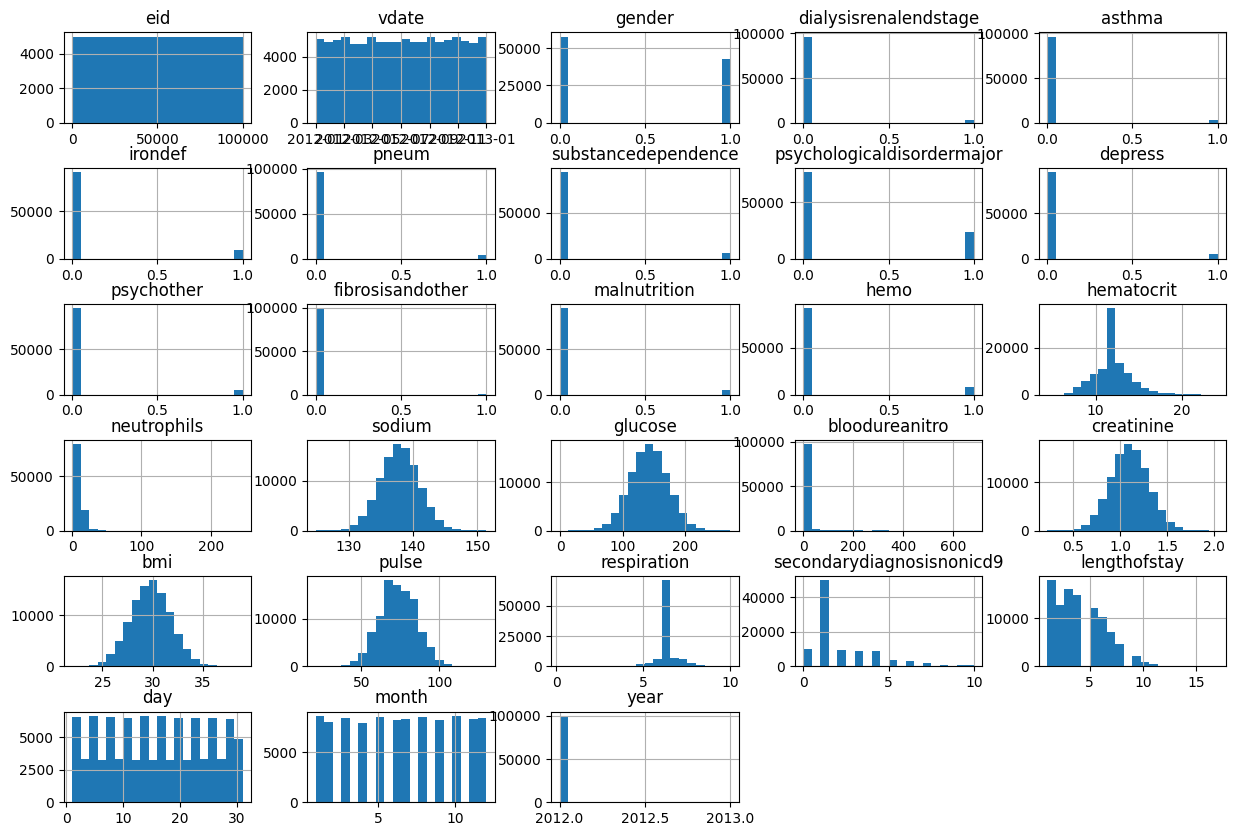

In [ ]:
df.hist(bins=20, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.show()

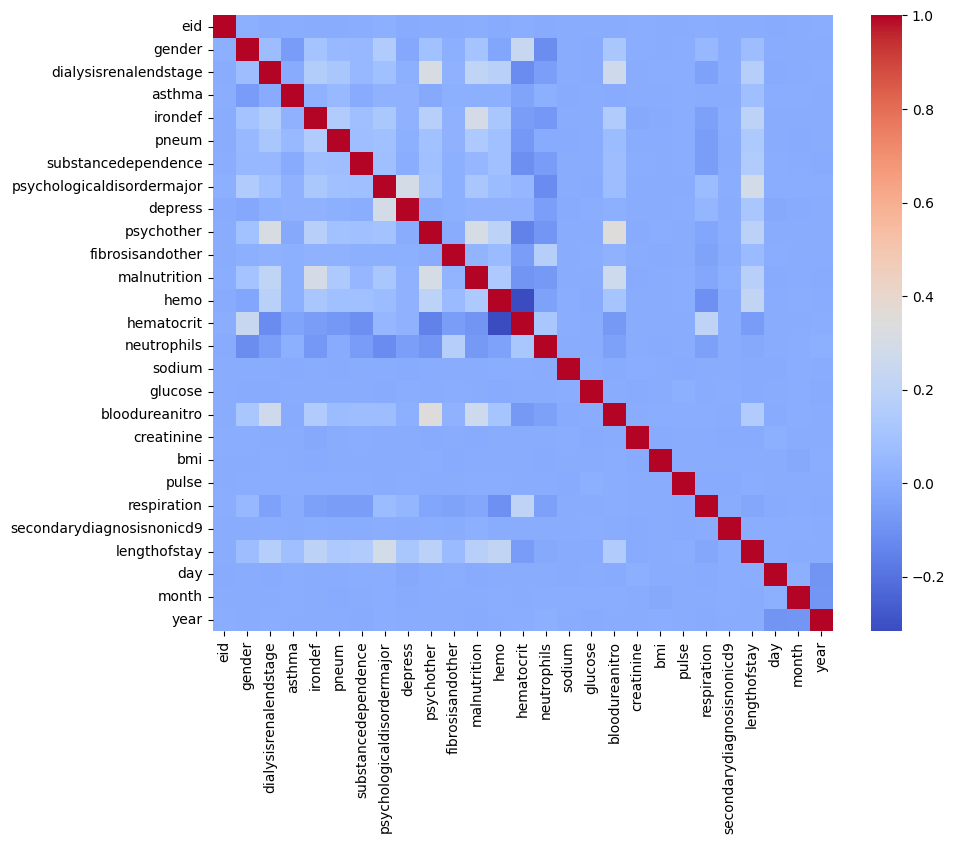

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, fmt='.2f', cmap='coolwarm')
plt.show()

## **Построение baseline модели**

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols),
        ('bin', 'passthrough', bin_cols),
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('reg', LinearRegression())
])

In [ ]:
X = df[cat_cols + bin_cols + num_cols]
y = df["lengthofstay"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['day', 'month', 'year',
                                                   'rcount', 'facid']),
                                                 ('num', StandardScaler(),
                                                  ['hematocrit', 'neutrophils',
                                                   'sodium', 'glucose',
                                                   'bloodureanitro',
                                                   'creatinine', 'bmi', 'pulse',
                                                   'respiration',
                                                   'secondarydiagnosisnonicd9']),
                                                 ('bin', 'passthrough',
                                                  ['gender',
                                                   'dialysisrenalendstage',
                                                   'asthma', 'irondef', 'pneum',
                                                   'substancedependence',
                                                   'psychologicaldisordermajor',
                                                   'depress', 'psychother',
                                                   'fibrosisandother',
                                                   'malnutrition', 'hemo'])])),
                ('reg', LinearRegression())])

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

Mean Squared Error: 1.2751662283637253
R^2: 0.7676106088188096


In [ ]:
pre = model.named_steps['preprocess']
lin = model.named_steps['reg']
feature_names = pre.get_feature_names_out()
coefs = lin.coef_.ravel()
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coefs
})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df.sort_values('abs_coef', ascending=False, inplace=True)
coef_df.head(10)  # топ-10 самых сильных признаков для текущей модели

feature      coef  abs_coef
46                   cat__rcount_5+  5.572251  5.572251
45                    cat__rcount_4  4.583333  4.583333
44                    cat__rcount_3  3.569588  3.569588
43                    cat__rcount_2  2.557106  2.557106
72                        bin__hemo  1.246094  1.246094
48                     cat__facid_C  1.113143  1.113143
42                    cat__rcount_1  0.992391  0.992391
49                     cat__facid_D  0.938479  0.938479
50                     cat__facid_E  0.787736  0.787736
67  bin__psychologicaldisordermajor  0.787477  0.787477

Видим, что больше всего на модель влияют признаки rcount, hemo, facid

# **Этап 2.1**

## **Поиск выбросов через статистические методы**

In [ ]:
z = df[num_cols].apply(lambda x: np.abs(stats.zscore(x, nan_policy='omit')))
z_outliers = (z > 3)
z_outliers.sum().sort_values(ascending=False)

respiration                  2273
secondarydiagnosisnonicd9    2050
hematocrit                   1113
bloodureanitro               1025
neutrophils                   791
bmi                           289
sodium                        285
glucose                       278
pulse                         274
creatinine                    245
dtype: int64

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


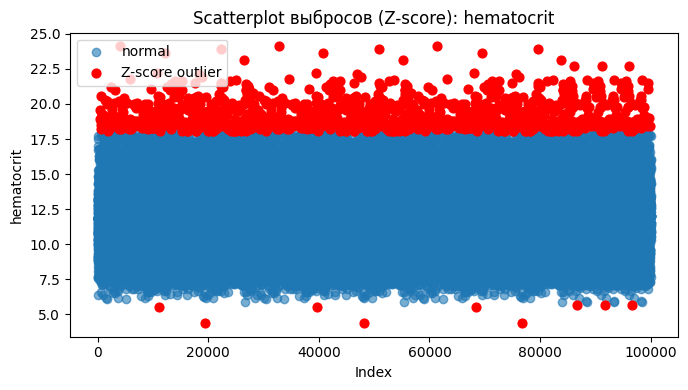

/tmp/ipython-input-2898447696.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


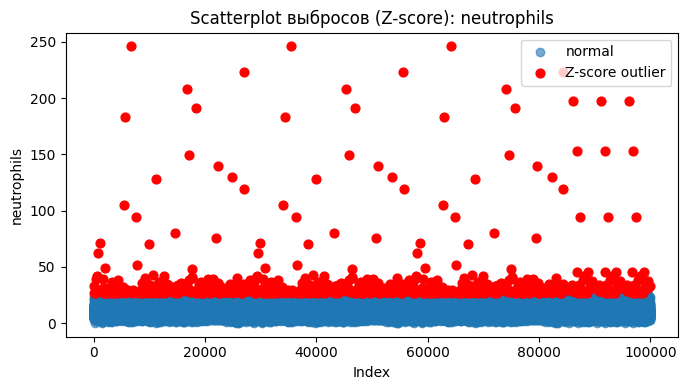

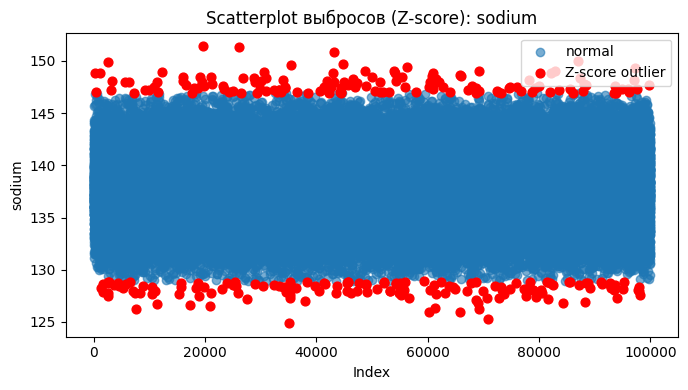

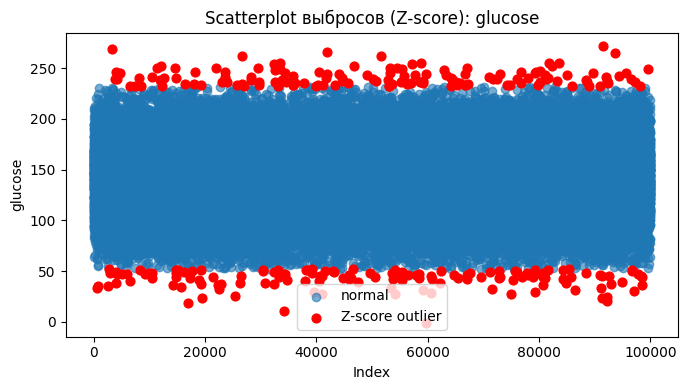

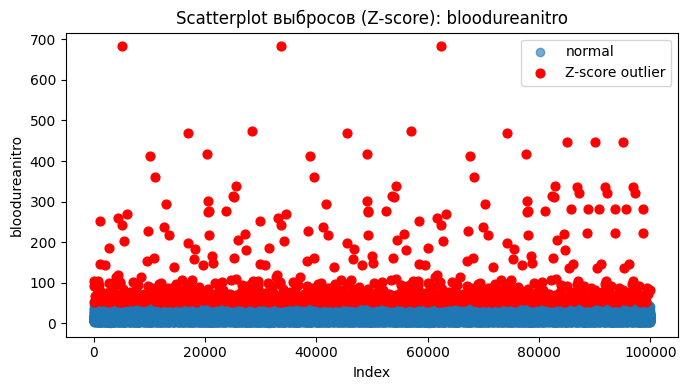

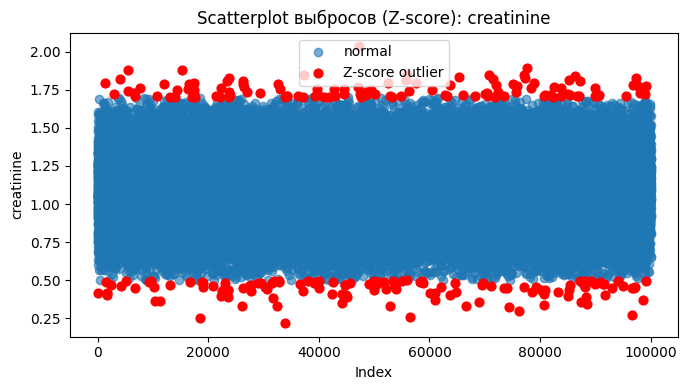

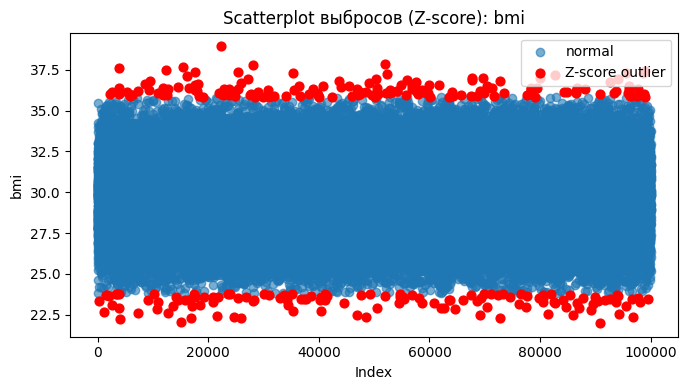

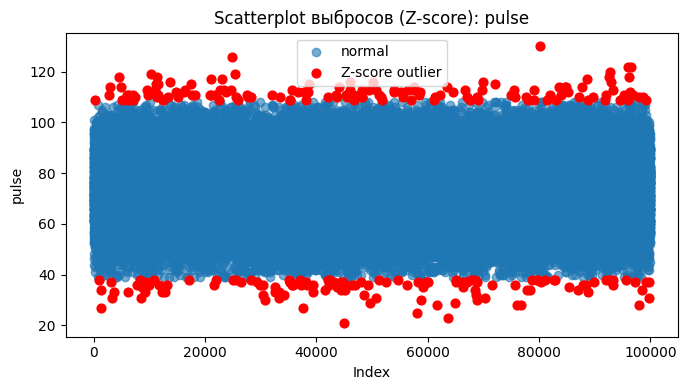

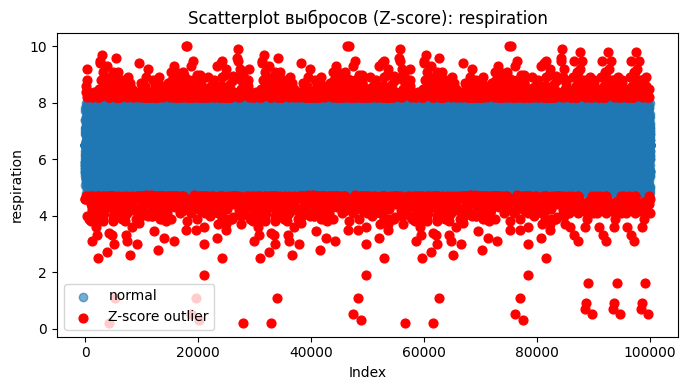

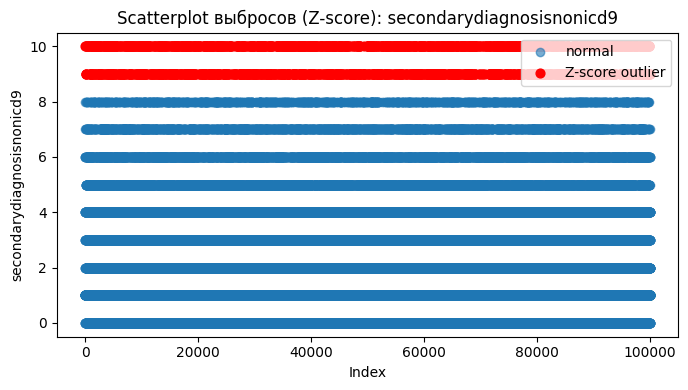

In [ ]:
for col in num_cols:
    plt.figure(figsize=(7, 4))

    plt.scatter(df.index[~z_outliers[col]], df.loc[~z_outliers[col], col],
                alpha=0.6, label="normal")

    plt.scatter(df.index[z_outliers[col]], df.loc[z_outliers[col], col],
                color='red', s=40, label="Z-score outlier")

    plt.title(f"Scatterplot выбросов (Z-score): {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
iqr_flags = pd.DataFrame(False, index=df.index, columns=num_cols)
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    iqr_flags[col] = (df[col] < lower) | (df[col] > upper)

iqr_counts = iqr_flags.sum().sort_values(ascending=False)
iqr_counts


respiration                  35167
bloodureanitro               19592
neutrophils                   6515
hematocrit                    5616
secondarydiagnosisnonicd9     5016
pulse                         1054
sodium                         711
glucose                        695
bmi                            685
creatinine                     675
dtype: int64

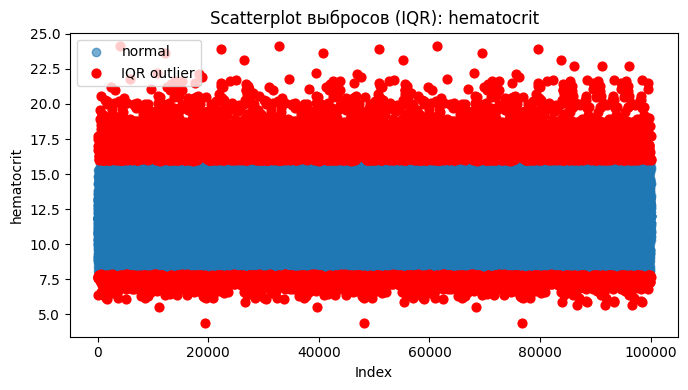

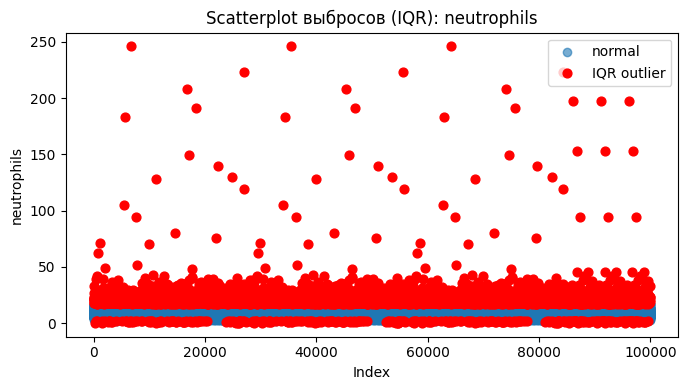

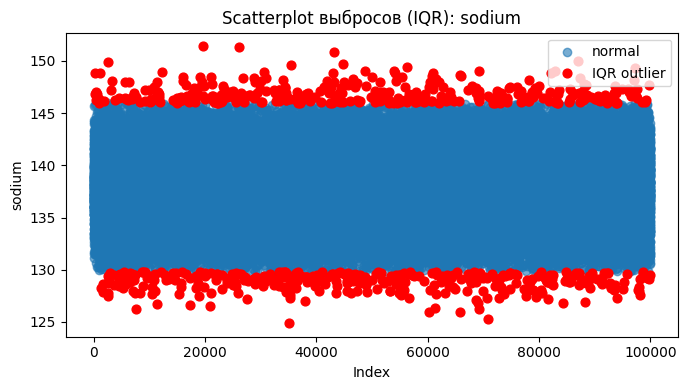

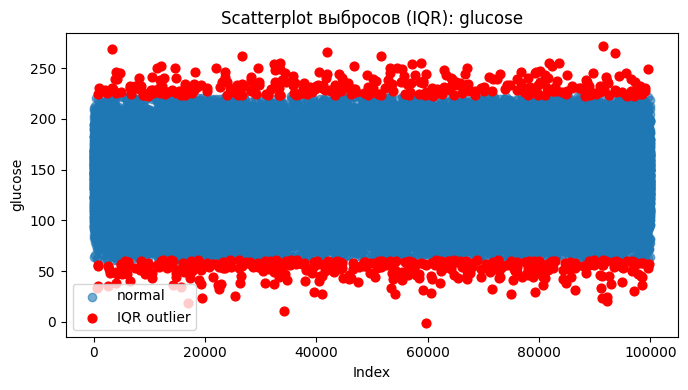

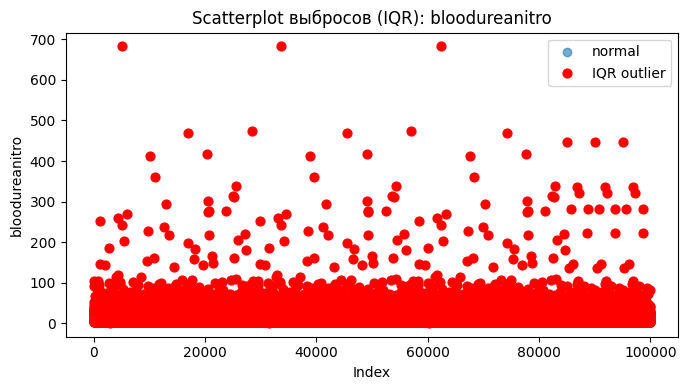

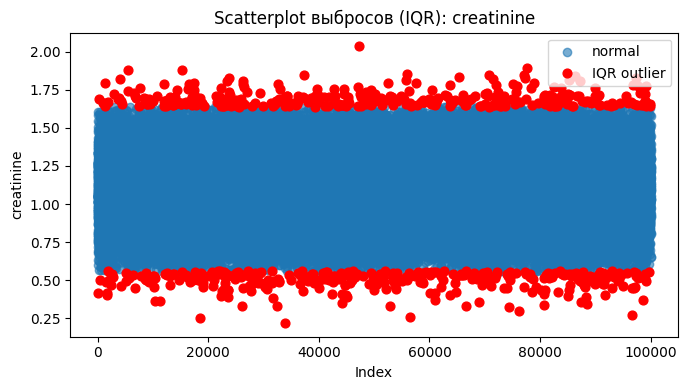

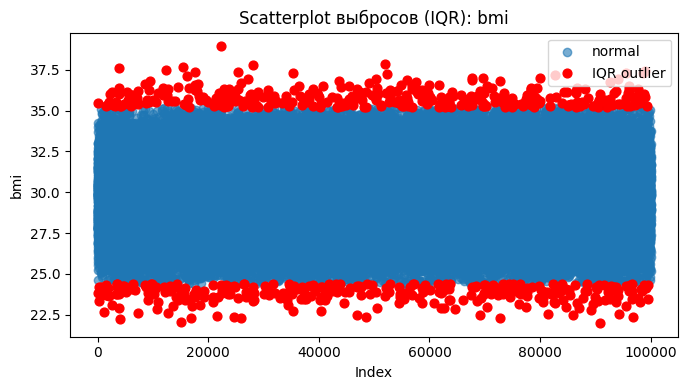

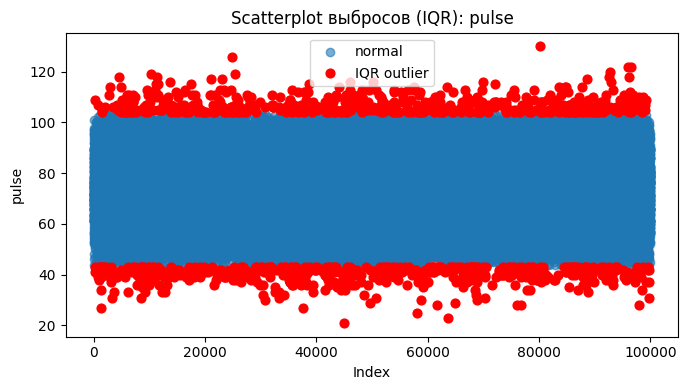

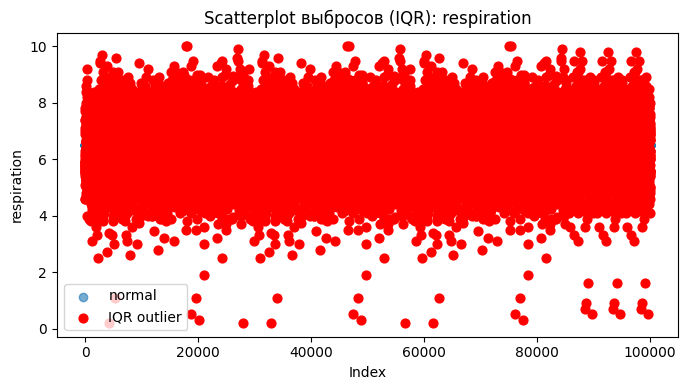

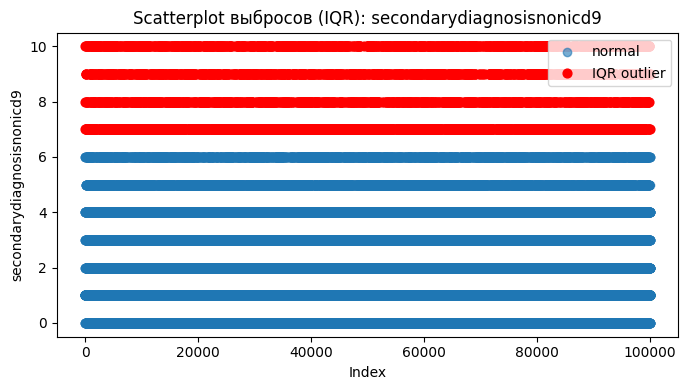

In [ ]:
for col in num_cols:
    plt.figure(figsize=(7, 4))

    plt.scatter(df.index[~iqr_flags[col]], df.loc[~iqr_flags[col], col],
                alpha=0.6, label="normal")

    plt.scatter(df.index[iqr_flags[col]], df.loc[iqr_flags[col], col],
                color='red', s=40, label="IQR outlier")

    plt.title(f"Scatterplot выбросов (IQR): {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
def grubbs_test_series(x, alpha=0.05):
    x = x.dropna()
    n = len(x)
    mean_x = x.mean()
    std_x = x.std(ddof=1)
    deviations = np.abs(x - mean_x)
    G = deviations.max() / std_x

    t_val = t.ppf(1 - alpha / (2*n), n-2)
    G_crit = ((n-1)/np.sqrt(n)) * np.sqrt(t_val**2 / (n-2 + t_val**2))
    return G, G_crit, x.index[deviations.argmax()]

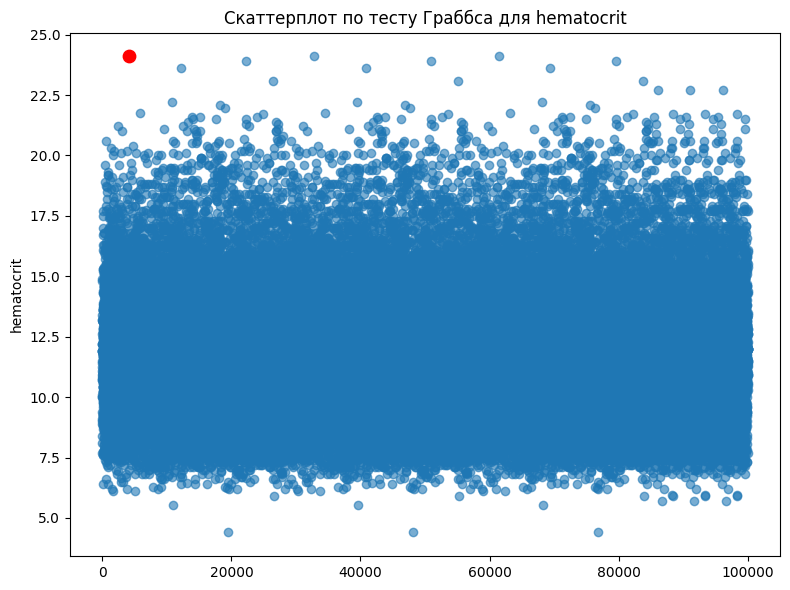

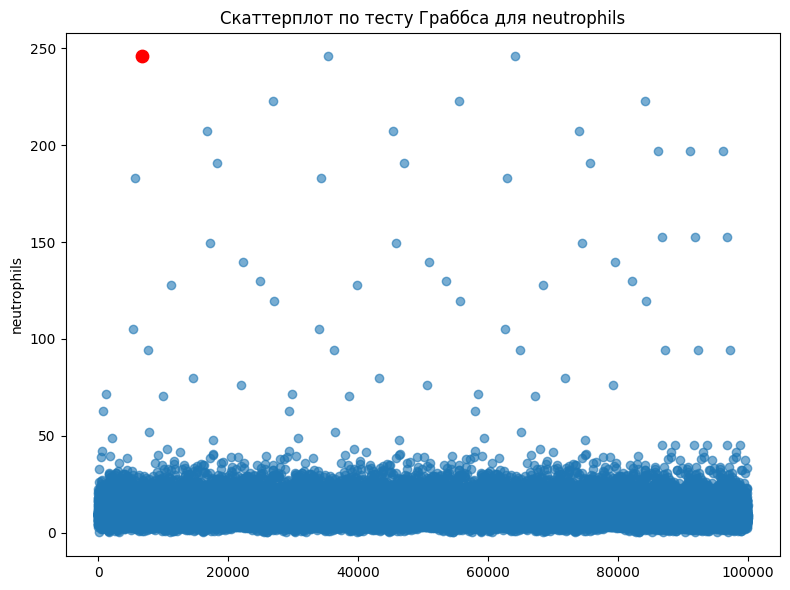

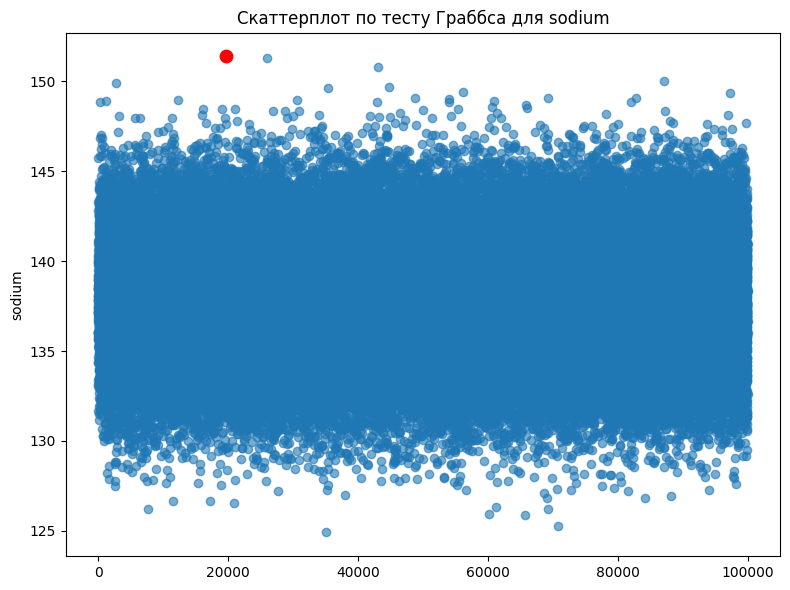

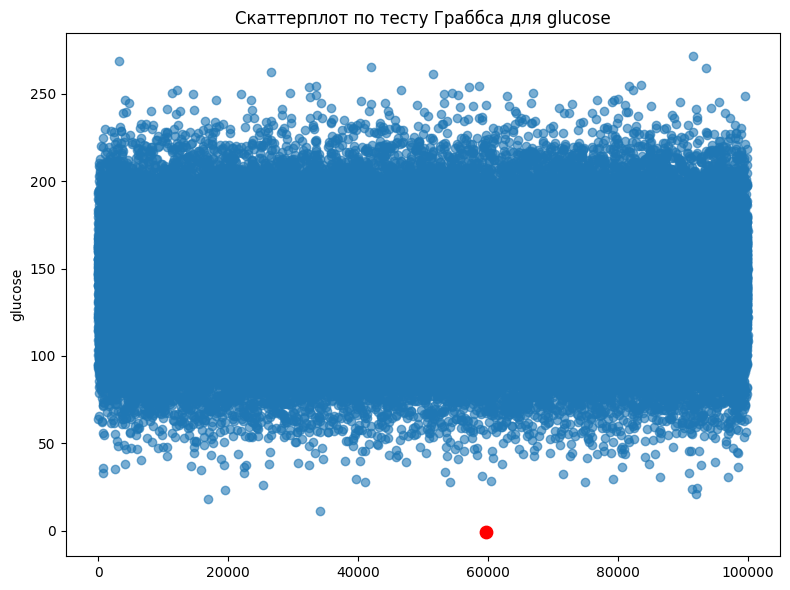

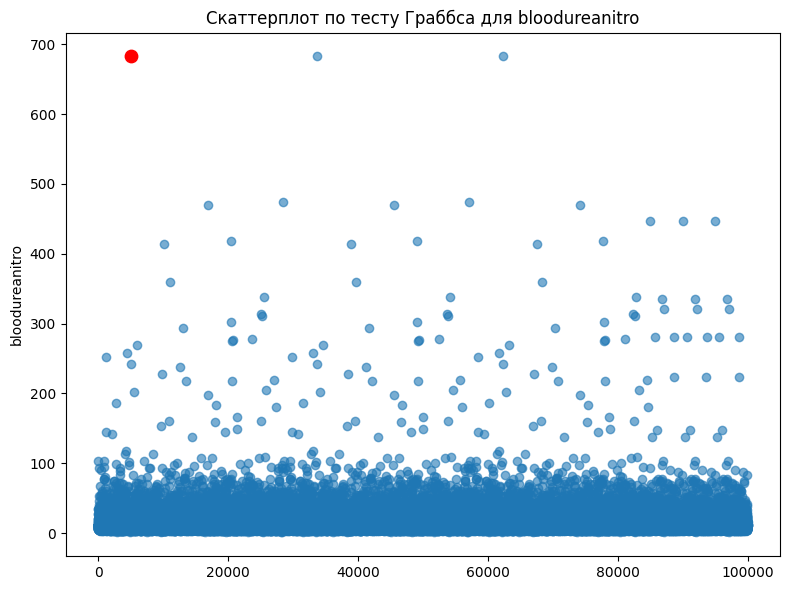

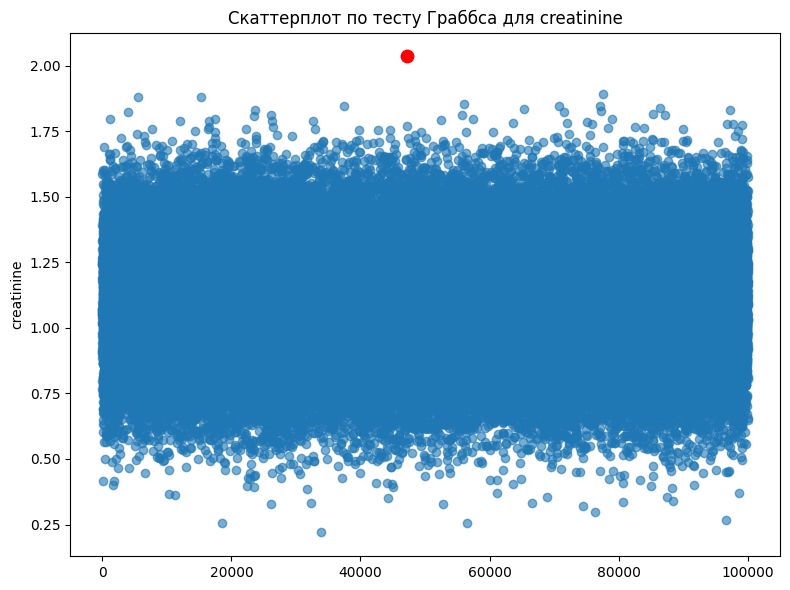

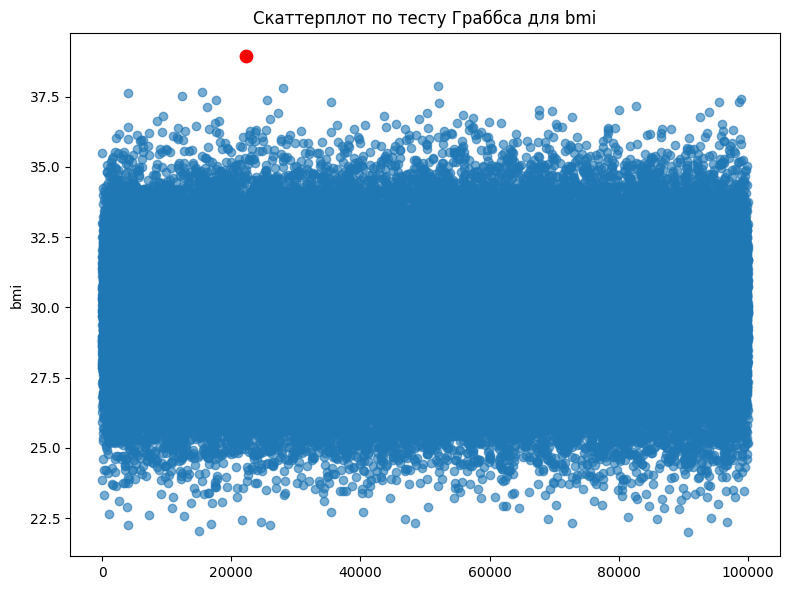

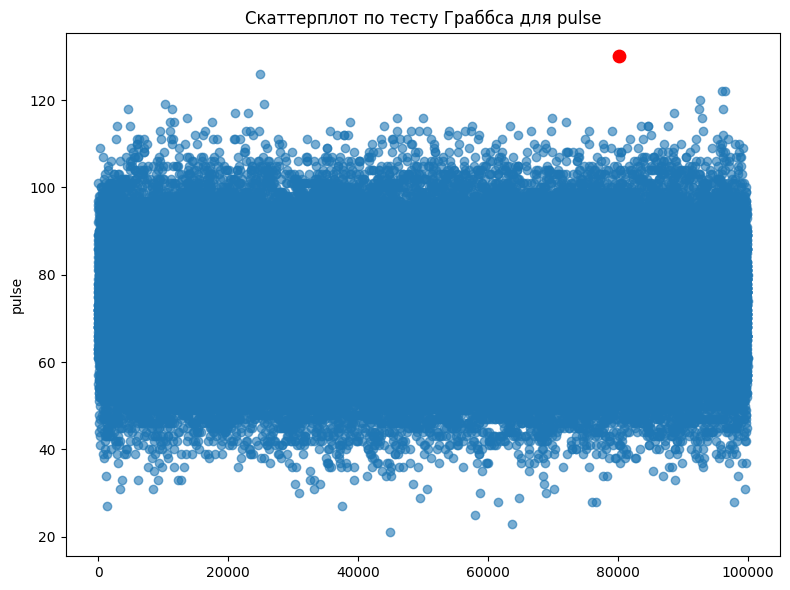

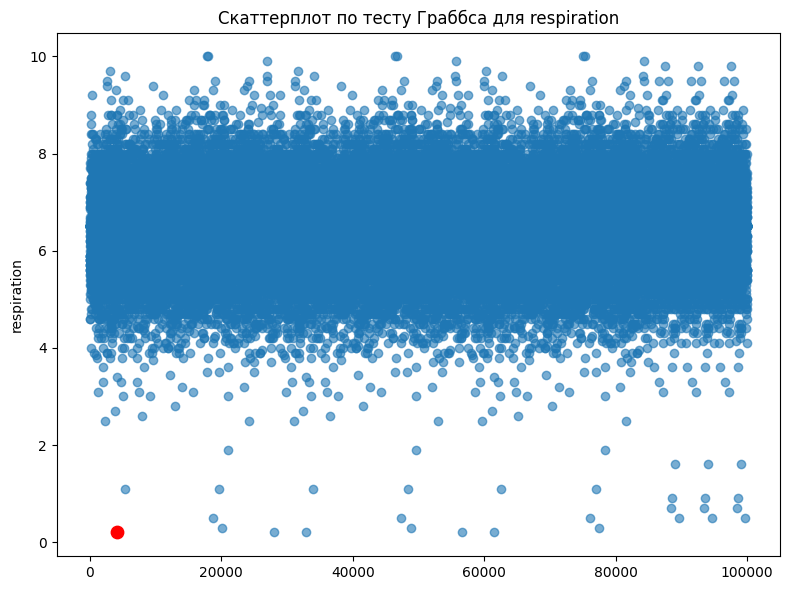

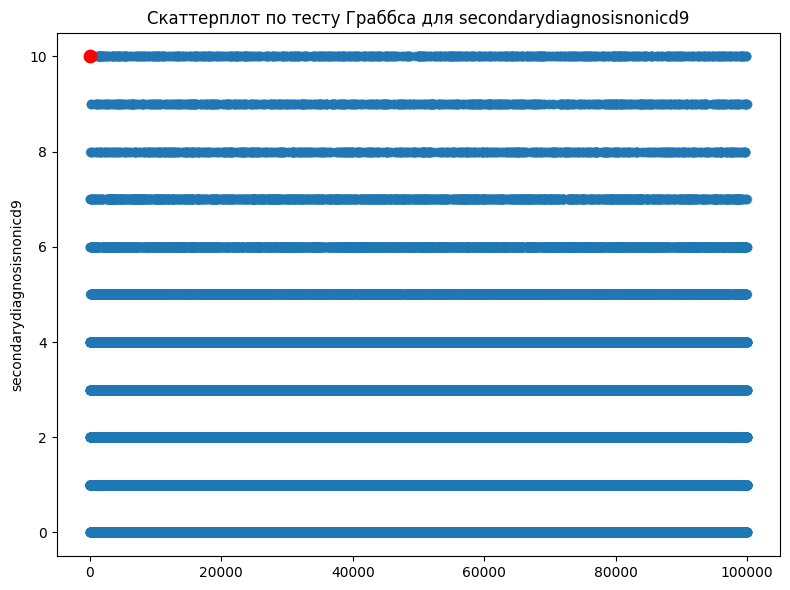

In [ ]:
for col in num_cols:
    G, G_crit, idx = grubbs_test_series(df[col])

    plt.figure(figsize=(8, 6))

    plt.scatter(df.index, df[col], alpha=0.6, label="normal")

    plt.scatter(idx, df.loc[idx, col], color='red', s=80)

    plt.title(f"Скаттерплот по тесту Граббса для {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


#### **Сразу хотим отметить, что в медицинском датасете в принципе очень трудно судить по наблюдениям, являются ли выбросами или нет, поэтому статистические оценки точно не будут хорошими индикаторами того, явлеется значение выбросом или нет, в нашем случае скорее будет необходимо вручную смотреть на графики (scatter, hist) и с точки зрения здравого смысла определять аномалии;**



#### **Также важно отметить, что в большинстве случаев мы не знаем единиц измерения, в которых они записаны именно в этом датасете и это не объявлено на странице датасета, так что за один запрос в гугле мы не сможем понять, является ли выбросом то или иное значение**


#### **В таком случае с уверенностью помечать наблюдение как выброс мы не можем, и гипотезу о том, что определеный порог является выбросом (не считая, например, отрицательного уровня вещества в крови) - очень смелое утверждение, т.к мы рискуем удалить валидное наблюдение, что может плохо сказаться на обучении модели, так что будем дропать строки только в крайних случаях**

 **Заметим, что в датасете есть наблюдение, у которого уровень глюкозы отрицательный, посмотрим внимательно на другие его показатели**

In [ ]:
df[df['glucose'] < 0][num_cols]

hematocrit  neutrophils      sodium   glucose  bloodureanitro  \
59774        11.9          9.4  137.517491 -1.005927            12.0   

       creatinine        bmi  pulse  respiration  secondarydiagnosisnonicd9  
59774    0.703748  28.503134     82          6.5                          1

**Все остальные показатели в норме, т.е лежат примерно в куполе нормального распределения, а значит это не выброс, а просто ошибка при заполнении, заменим ее на положительное значениеи оставим в датасете**

In [ ]:
df.loc[df['glucose'] < 0, 'glucose'] = df.loc[df['glucose'] < 0, 'glucose'].abs()
df[df['glucose'] < 0][num_cols] # Проверим, что удалили, вывод пустой - успех

Empty DataFrame
Columns: [hematocrit, neutrophils, sodium, glucose, bloodureanitro, creatinine, bmi, pulse, respiration, secondarydiagnosisnonicd9]
Index: []

#### **Теперь вспомним два самых подозрительных скаттерплота: 'bloodureanitro' и 'neutrophils'**

Text(0, 0.5, 'bloodureanitro')

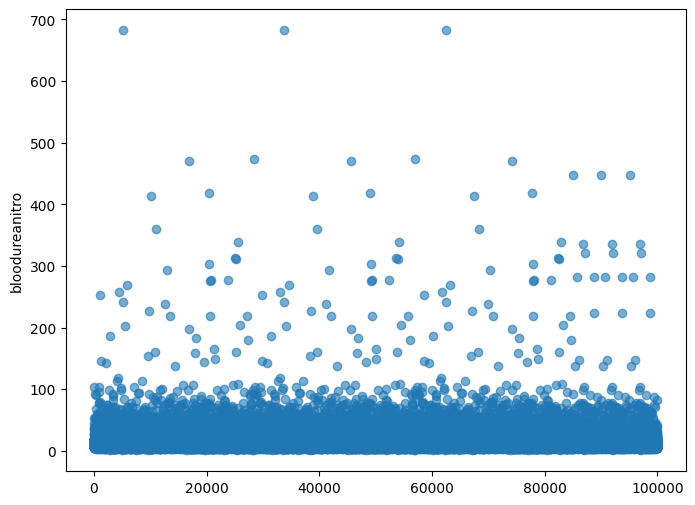

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['bloodureanitro'], alpha=0.6, label="normal")
plt.ylabel('bloodureanitro')

#### **Заметим странные значения, которые превосходят 500**

In [ ]:
df[df['bloodureanitro'] > 500][num_cols]

hematocrit  neutrophils      sodium     glucose  bloodureanitro  \
5090         12.3          7.5  140.492102  129.458808           682.5   
33748        12.3          7.5  134.435314  144.476644           682.5   
62406        12.3          7.5  134.787880  165.161211           682.5   

       creatinine        bmi  pulse  respiration  secondarydiagnosisnonicd9  
5090     1.337174  25.057013     89          6.2                          3  
33748    1.151642  29.953663     80          6.2                          1  
62406    1.470550  30.273694     84          6.2                          3

#### **У этих трех наблюдений совпадают почти все показатели, что очень странно**

In [ ]:
mask = df['bloodureanitro'] <= 500
filtered_df = df[mask].copy()

X = filtered_df[cat_cols + bin_cols + num_cols]
y = filtered_df["lengthofstay"]

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols),
        ('bin', 'passthrough', bin_cols),
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('reg', LinearRegression())
])


mask = df['bloodureanitro'] <= 500
filtered_df = df[mask].copy()

X = filtered_df[cat_cols + bin_cols + num_cols]
y = filtered_df["lengthofstay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')


Mean Squared Error: 1.3082018326522609
R^2: 0.7628302563212519


#### **Но тем не менее, при их удалении качество модели падает, поэтому в исходном датасете дропать эти строки не будем**

Text(0, 0.5, 'neutrophils')

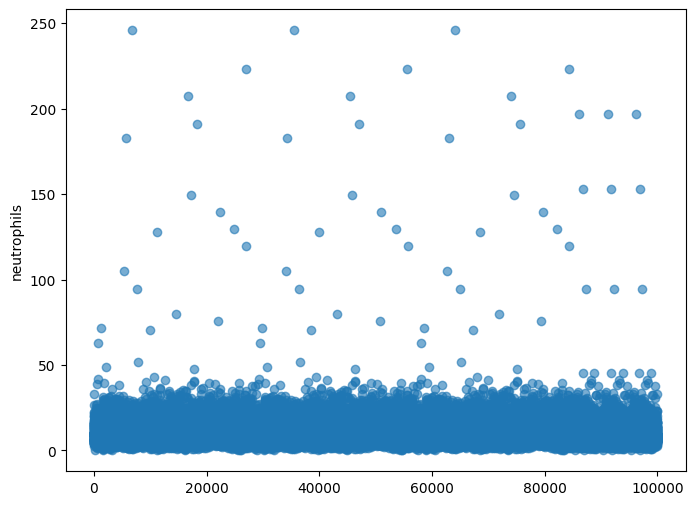

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['neutrophils'], alpha=0.6, label="normal")
plt.ylabel('neutrophils')

#### **Заметим странные значения, которые превосходят 150**

In [ ]:
df[df['neutrophils'] > 150][num_cols]

hematocrit  neutrophils      sodium     glucose  bloodureanitro  \
5660         11.9        183.1  139.879224  133.872550            16.0   
6815         11.9        245.9  136.686477   97.178812            14.0   
16762        11.9        207.6  135.834013  142.820819            17.0   
18372        11.9        190.9  136.857695  118.065689             9.0   
26931        11.9        223.1  129.057944  188.474504            14.0   
34318        11.9        183.1  136.199425  128.085997            16.0   
35473        11.9        245.9  135.007446  111.492171            14.0   
45420        11.9        207.6  133.054937  144.566073            17.0   
47030        11.9        190.9  137.808481  184.973857             9.0   
55589        11.9        223.1  137.578151  139.448374            14.0   
62976        11.9        183.1  136.622943  166.055065            16.0   
64131        11.9        245.9  135.604168  144.944111            14.0   
74078        11.9        207.6  137.931703  124.635266            17.0   
75688        11.9        190.9  136.566274  134.083146             9.0   
84247        11.9        223.1  140.023267  161.773738            14.0   
86159         9.5        197.1  137.696180  146.514010            15.0   
86838        11.6        152.9  141.927803  174.856846            25.0   
91159         9.5        197.1  139.808838  179.426903            15.0   
91838        11.6        152.9  140.087376  145.101713            25.0   
96159         9.5        197.1  134.294976   77.052480            15.0   
96838        11.6        152.9  143.205879  159.637143            25.0   

       creatinine        bmi  pulse  respiration  secondarydiagnosisnonicd9  
5660     0.973103  29.481125     92          5.7                          4  
6815     0.927890  28.907575     66          6.5                          7  
16762    0.766781  29.763378     83          5.7                          1  
18372    1.127561  27.924118     79          4.5                          6  
26931    1.147719  29.027532     70          5.0                          1  
34318    0.888292  27.639823     72          5.7                          1  
35473    1.307323  27.726360     61          6.5                          6  
45420    0.968604  27.475462     72          5.7                          6  
47030    1.152088  27.753738     71          4.5                          1  
55589    0.677713  27.815698     75          5.0                          1  
62976    0.945338  32.411618     72          5.7                          1  
64131    1.092402  31.213754     81          6.5                          1  
74078    0.956197  32.759227     49          5.7                          4  
75688    1.377222  29.007303     67          4.5                          1  
84247    1.015259  32.150322     85          5.0                          1  
86159    1.379262  30.022025     70          6.5                          1  
86838    0.977112  28.707027     91          6.5                          2  
91159    0.945097  31.742954     68          6.5                          1  
91838    1.303734  31.046053     84          6.5                          3  
96159    0.877690  28.154062     97          6.5                          1  
96838    1.099909  32.052991     79          6.5                          4

#### **Картина очень схожая, у этих наблюдений есть очень странные совпаднения точь-в-точь в непрерывных признаках**


## **Поиск выбросов через ML методы**

#### **Применим скейлер, т.к он необходим для работы методов**

In [ ]:
X = df[num_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
iso = IsolationForest(contamination=0.02, random_state=42)
iso_labels = iso.fit_predict(X_scaled)
iso_outliers = (iso_labels == -1)


In [ ]:
ocsvm = OneClassSVM(kernel='rbf', nu=0.02, gamma='scale')
svm_labels = ocsvm.fit_predict(X_scaled)
svm_outliers = (svm_labels == -1)


In [ ]:
ml_outliers = pd.DataFrame({
    'IsolationForest': iso_outliers,
    'OneClassSVM': svm_outliers,
}, index=df.index)

ml_outliers.sum()


IsolationForest    2000
OneClassSVM        1996
dtype: int64

In [ ]:
def plot_ml_outliers(X, outlier_flags, title):
    plt.figure(figsize=(15, 5))
    cols = X.columns

    for i, col in enumerate(cols[1:4], 1):
        plt.subplot(1, 3, i)
        sns.scatterplot(
            x=X[cols[0]], y=X[col],
            hue=outlier_flags,
            palette={False: "blue", True: "red"},
            alpha=0.6
        )
        plt.title(f"{title}: {cols[0]} vs {col}")
        plt.legend([], [], frameon=False)

    plt.tight_layout()
    plt.show()

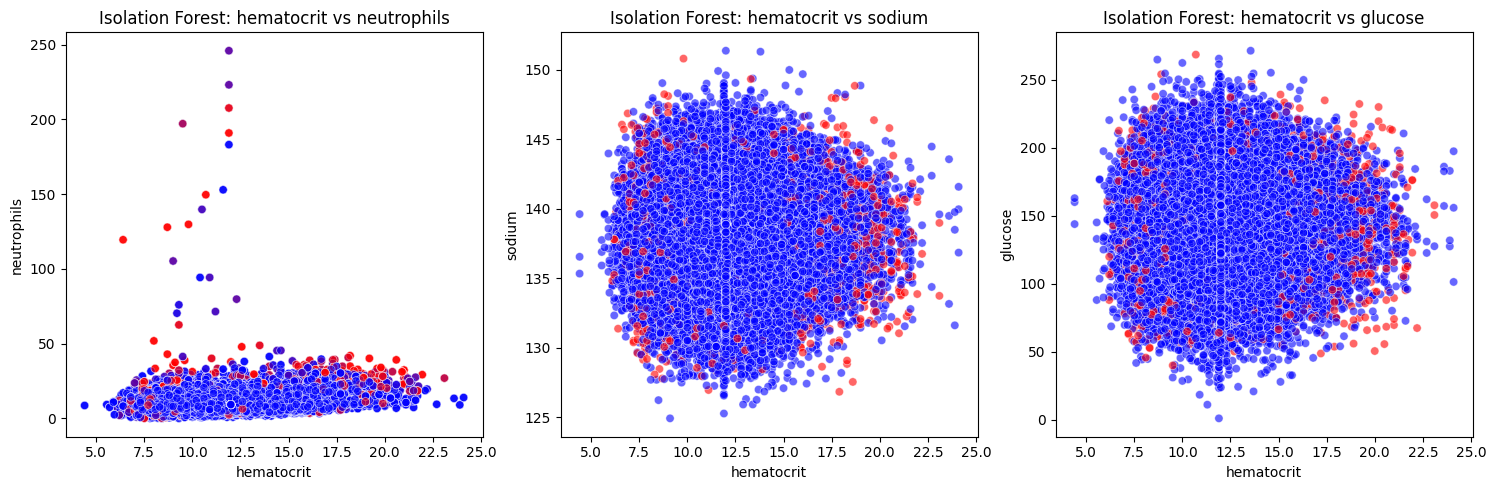

In [ ]:
plot_ml_outliers(df[num_cols], iso_outliers, "Isolation Forest")


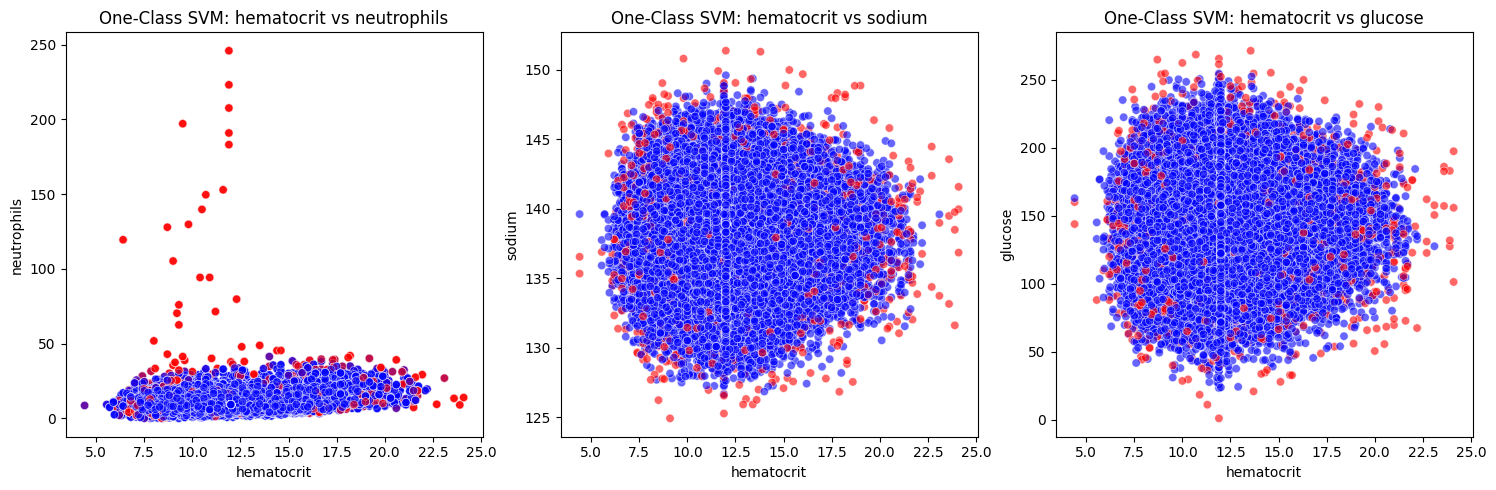

In [ ]:
plot_ml_outliers(df[num_cols], svm_outliers, "One-Class SVM")


#### **Оба метода заметили странные точки, у которых слишком большой показатель 'neutrophils', посмотрим на них внимательнее;**


**В показателях по другим признакам методы также выделили выбросы даже внутри "облаков", но такие точки удалять очень рискованно**

In [ ]:
df[df['neutrophils'] > 100][num_cols]

hematocrit  neutrophils      sodium     glucose  bloodureanitro  \
5408          9.0        105.3  138.876794  125.154839            35.0   
5660         11.9        183.1  139.879224  133.872550            16.0   
6815         11.9        245.9  136.686477   97.178812            14.0   
11234         8.7        127.9  139.663190  110.798511             9.0   
16762        11.9        207.6  135.834013  142.820819            17.0   
17195        10.7        149.6  136.025762  157.173342            19.0   
18372        11.9        190.9  136.857695  118.065689             9.0   
22347        10.5        139.8  142.240840  128.517920            18.0   
24936         9.8        129.8  135.380127  147.748008            17.0   
26931        11.9        223.1  129.057944  188.474504            14.0   
27022         6.4        119.5  138.313838  111.460104            38.0   
34066         9.0        105.3  148.126341  171.851784            35.0   
34318        11.9        183.1  136.199425  128.085997            16.0   
35473        11.9        245.9  135.007446  111.492171            14.0   
39892         8.7        127.9  143.165189  130.599750             9.0   
45420        11.9        207.6  133.054937  144.566073            17.0   
45853        10.7        149.6  140.846354  132.131031            19.0   
47030        11.9        190.9  137.808481  184.973857             9.0   
51005        10.5        139.8  143.104235  174.480963            18.0   
53594         9.8        129.8  136.456048  140.766698            17.0   
55589        11.9        223.1  137.578151  139.448374            14.0   
55680         6.4        119.5  131.369424  109.878481            38.0   
62724         9.0        105.3  139.647651  157.178469            35.0   
62976        11.9        183.1  136.622943  166.055065            16.0   
64131        11.9        245.9  135.604168  144.944111            14.0   
68550         8.7        127.9  139.105300  132.755393             9.0   
74078        11.9        207.6  137.931703  124.635266            17.0   
74511        10.7        149.6  137.106752  125.258226            19.0   
75688        11.9        190.9  136.566274  134.083146             9.0   
79663        10.5        139.8  134.991745  173.796294            18.0   
82252         9.8        129.8  131.497307  132.226108            17.0   
84247        11.9        223.1  140.023267  161.773738            14.0   
84338         6.4        119.5  142.020555  142.821254            38.0   
86159         9.5        197.1  137.696180  146.514010            15.0   
86838        11.6        152.9  141.927803  174.856846            25.0   
91159         9.5        197.1  139.808838  179.426903            15.0   
91838        11.6        152.9  140.087376  145.101713            25.0   
96159         9.5        197.1  134.294976   77.052480            15.0   
96838        11.6        152.9  143.205879  159.637143            25.0   

       creatinine        bmi  pulse  respiration  secondarydiagnosisnonicd9  
5408     0.567476  28.681134     61          6.9                          0  
5660     0.973103  29.481125     92          5.7                          4  
6815     0.927890  28.907575     66          6.5                          7  
11234    0.796342  29.507133     77          4.9                          1  
16762    0.766781  29.763378     83          5.7                          1  
17195    1.409387  31.115581     53          6.2                          1  
18372    1.127561  27.924118     79          4.5                          6  
22347    0.948435  30.781223     87          5.7                          1  
24936    0.973502  29.771992     79          3.5                          6  
26931    1.147719  29.027532     70          5.0                          1  
27022    1.215525  30.986198     74          4.9                          6  
34066    0.873645  30.083497     99          6.9                          3  
34318    0.888292  27.639823    

#### **Снова очень странные совпадения, почти наверняка это все шум, но лучше снова проверим качество модели**

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols),
        ('bin', 'passthrough', bin_cols),
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('reg', LinearRegression())
])


mask = df['neutrophils'] <= 100
filtered_df = df[mask].copy()

X = filtered_df[cat_cols + bin_cols + num_cols]
y = filtered_df["lengthofstay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')


Mean Squared Error: 1.285610198683369
R^2: 0.7669129037525596


#### **Качество модели снова ухудшилось так что из датасета не будем удалять эти наблюдения**

#### **Добавим признак на основе экстремальных значений в 'bloodureanitro' и 'neutrophils'**

In [ ]:
df['probably_outlier'] = ((df['bloodureanitro'] > 500) | (df['neutrophils'] > 100)).astype(int)
df[df['probably_outlier'] == 1][num_cols]

hematocrit  neutrophils      sodium     glucose  bloodureanitro  \
5090         12.3          7.5  140.492102  129.458808           682.5   
5408          9.0        105.3  138.876794  125.154839            35.0   
5660         11.9        183.1  139.879224  133.872550            16.0   
6815         11.9        245.9  136.686477   97.178812            14.0   
11234         8.7        127.9  139.663190  110.798511             9.0   
16762        11.9        207.6  135.834013  142.820819            17.0   
17195        10.7        149.6  136.025762  157.173342            19.0   
18372        11.9        190.9  136.857695  118.065689             9.0   
22347        10.5        139.8  142.240840  128.517920            18.0   
24936         9.8        129.8  135.380127  147.748008            17.0   
26931        11.9        223.1  129.057944  188.474504            14.0   
27022         6.4        119.5  138.313838  111.460104            38.0   
33748        12.3          7.5  134.435314  144.476644           682.5   
34066         9.0        105.3  148.126341  171.851784            35.0   
34318        11.9        183.1  136.199425  128.085997            16.0   
35473        11.9        245.9  135.007446  111.492171            14.0   
39892         8.7        127.9  143.165189  130.599750             9.0   
45420        11.9        207.6  133.054937  144.566073            17.0   
45853        10.7        149.6  140.846354  132.131031            19.0   
47030        11.9        190.9  137.808481  184.973857             9.0   
51005        10.5        139.8  143.104235  174.480963            18.0   
53594         9.8        129.8  136.456048  140.766698            17.0   
55589        11.9        223.1  137.578151  139.448374            14.0   
55680         6.4        119.5  131.369424  109.878481            38.0   
62406        12.3          7.5  134.787880  165.161211           682.5   
62724         9.0        105.3  139.647651  157.178469            35.0   
62976        11.9        183.1  136.622943  166.055065            16.0   
64131        11.9        245.9  135.604168  144.944111            14.0   
68550         8.7        127.9  139.105300  132.755393             9.0   
74078        11.9        207.6  137.931703  124.635266            17.0   
74511        10.7        149.6  137.106752  125.258226            19.0   
75688        11.9        190.9  136.566274  134.083146             9.0   
79663        10.5        139.8  134.991745  173.796294            18.0   
82252         9.8        129.8  131.497307  132.226108            17.0   
84247        11.9        223.1  140.023267  161.773738            14.0   
84338         6.4        119.5  142.020555  142.821254            38.0   
86159         9.5        197.1  137.696180  146.514010            15.0   
86838        11.6        152.9  141.927803  174.856846            25.0   
91159         9.5        197.1  139.808838  179.426903            15.0   
91838        11.6        152.9  140.087376  145.101713            25.0   
96159         9.5        197.1  134.294976   77.052480            15.0   
96838        11.6        152.9  143.205879  159.637143            25.0   

       creatinine        bmi  pulse  respiration  secondarydiagnosisnonicd9  
5090     1.337174  25.057013     89          6.2                          3  
5408     0.567476  28.681134     61          6.9                          0  
5660     0.973103  29.481125     92          5.7                          4  
6815     0.927890  28.907575     66          6.5                          7  
11234    0.796342  29.507133     77          4.9                          1  
16762    0.766781  29.763378     83          5.7                          1  
17195    1.409387  31.115581     53          6.2                          1  
18372    1.127561  27.924118     79          4.5                          6  
22347    0.948435  30.781223     87          5.7                          1  
24936    0.973502  29.771992     79         

In [ ]:
bin_cols = bin_cols + ['probably_outlier']
bin_cols

['gender',
 'dialysisrenalendstage',
 'asthma',
 'irondef',
 'pneum',
 'substancedependence',
 'psychologicaldisordermajor',
 'depress',
 'psychother',
 'fibrosisandother',
 'malnutrition',
 'hemo',
 'probably_outlier']

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols),
        ('bin', 'passthrough', bin_cols),
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('reg', LinearRegression())
])


X = df[cat_cols + bin_cols + num_cols]
y = df["lengthofstay"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')


Mean Squared Error: 1.2659057162471306
R^2: 0.7692982670432302


#### **Качество модели улучшилось, а значит добавление этого признако дало модели важный сигнал**

## **Краткий саммари по тому, что было сделано в пункте 2.1**


- **1) Применили Z-оценку, межквартильный размах (IQR), тест Граббса для нахождения выбросов, что в медицинском датасете очевидно сильных продвижений не даст, но совсем очевидные выбросы с их помощью найти было бы можно, если бы они были**

- **2) Визуализировали и объяснили, почему не спешим что-либо делать с подозрительными наблюдениями (удалять/корректировать)**

- **3) Применили простейшие ML методы для поиска аномалий, выбрал именно их, т.к они самые интерпретируемые и быстровыполняющиеся, т.к все равно не ждали никаких инсайтов от их применения и смотреть все равно нужно самим.**

- **4) Добавили признак 'probably_outlier' для тех наблюдений, у которых встречаются экстремальные значения в некоторых колонках, т.к удаление таких строк привело к ухудшению качества модели, а значит они скорее не являлись выбросами, поэтому сделали для модели такой сигнал об аномальном значении и это улучшило качество модели**

# **Этап 2.2**

In [ ]:
df.columns

Index(['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma',
       'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
       'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo',
       'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'respiration',
       'secondarydiagnosisnonicd9', 'discharged', 'facid', 'lengthofstay',
       'day', 'month', 'year', 'probably_outlier'],
      dtype='object')

In [ ]:
df["dow"] = df["vdate"].dt.dayofweek
df["rcount"] = df["rcount"].astype(str).str.extract(r"(\d+)")[0].astype(int)

## Временные и контекстные признаки
- циклическое кодирование месяца и дня недели плюс флаг выходного для сезонности;
- `disease_count` — число диагнозов по бинарным полям;
- `bun_creatinine_ratio`, `resp_pulse_ratio`, `metabolic_load`, `vitals_load` — индикаторы нагрузки на пациента и дыхания.

In [ ]:
df["dow"] = df["vdate"].dt.dayofweek
df["rcount"] = df["rcount"].astype(str).str.extract(r"(\d+)")[0].astype(int)

disease_cols = [
    "dialysisrenalendstage",
    "asthma",
    "irondef",
    "pneum",
    "substancedependence",
    "psychologicaldisordermajor",
    "depress",
    "psychother",
    "fibrosisandother",
    "malnutrition",
    "hemo",
]
df["disease_count"] = df[disease_cols].sum(axis=1)

df["bun_creatinine_ratio"] = df["bloodureanitro"] / df["creatinine"].replace(0, np.nan)
df["resp_pulse_ratio"] = df["respiration"] / df["pulse"].replace(0, np.nan)
df["metabolic_load"] = df[["glucose", "sodium"]].mean(axis=1)
df["vitals_load"] = df[["pulse", "respiration"]].sum(axis=1)

df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)
df["dow_sin"] = np.sin(2 * np.pi * df["dow"] / 7)
df["dow_cos"] = np.cos(2 * np.pi * df["dow"] / 7)
df["is_weekend"] = (df["dow"] >= 5).astype(int)

df["bun_creatinine_ratio"] = (
    df["bun_creatinine_ratio"]
    .replace([np.inf, -np.inf], np.nan)
    .fillna(df["bun_creatinine_ratio"].median())
)
df["resp_pulse_ratio"] = (
    df["resp_pulse_ratio"]
    .replace([np.inf, -np.inf], np.nan)
    .fillna(df["resp_pulse_ratio"].median())
)

df.head()


eid      vdate  rcount  gender  dialysisrenalendstage  asthma  irondef  \
0    1 2012-08-29       0       0                      0       0        0   
1    2 2012-05-26       5       0                      0       0        0   
2    3 2012-09-22       1       0                      0       0        0   
3    4 2012-08-09       0       0                      0       0        0   
4    5 2012-12-20       0       0                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...  disease_count  \
0      0                    0                           0  ...              0   
1      0                    0                           0  ...              0   
2      0                    0                           0  ...              0   
3      0                    0                           0  ...              0   
4      1                    0                           1  ...              2   

   bun_creatinine_ratio  resp_pulse_ratio  metabolic_load  vitals_load  \
0              8.628610          0.067708      166.419025        102.5   
1              8.482085          0.106557      115.405100         67.5   
2             11.259673          0.101562      131.794519         70.5   
3             13.232446          0.085526      151.185525         82.5   
4              9.252896          0.083582      116.760745         72.6   

      month_sin     month_cos   dow_sin   dow_cos  is_weekend  
0 -8.660254e-01 -5.000000e-01  0.974928 -0.222521           0  
1  5.000000e-01 -8.660254e-01 -0.974928 -0.222521           1  
2 -1.000000e+00 -1.836970e-16 -0.974928 -0.222521           1  
3 -8.660254e-01 -5.000000e-01  0.433884 -0.900969           0  
4 -2.449294e-16  1.000000e+00  0.433884 -0.900969           0  

[5 rows x 43 columns]

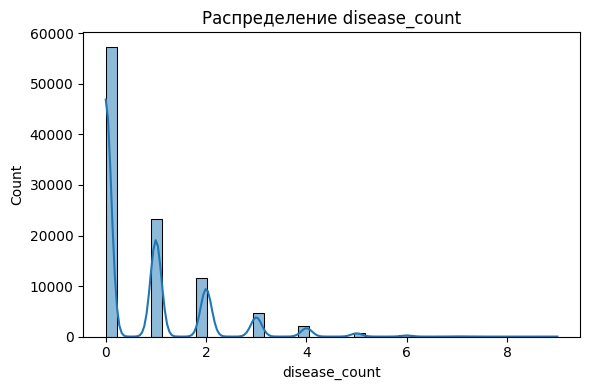

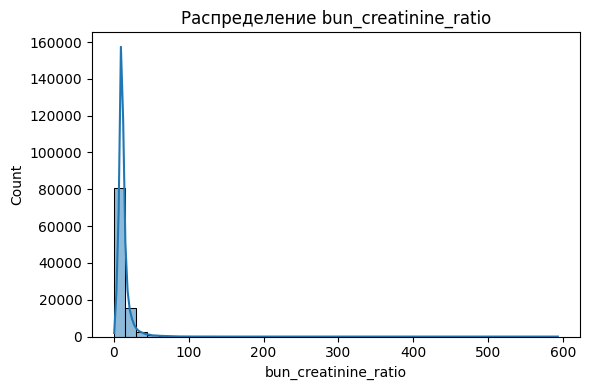

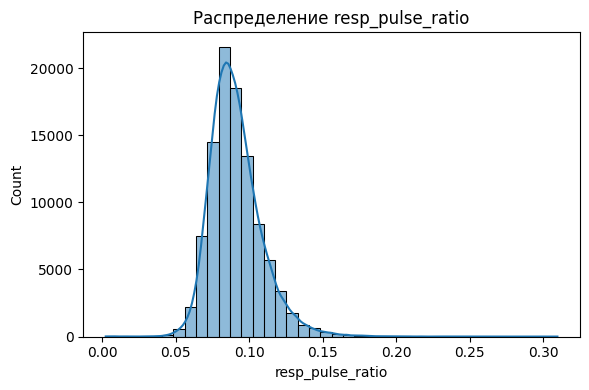

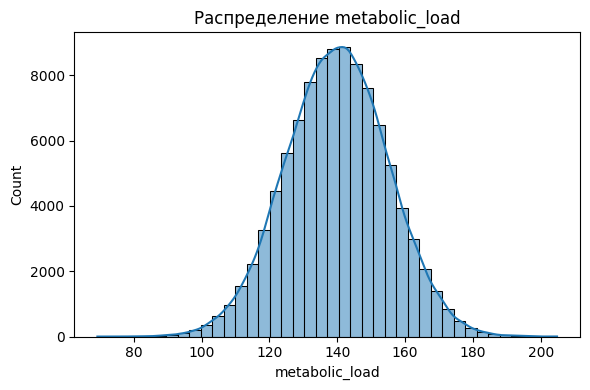

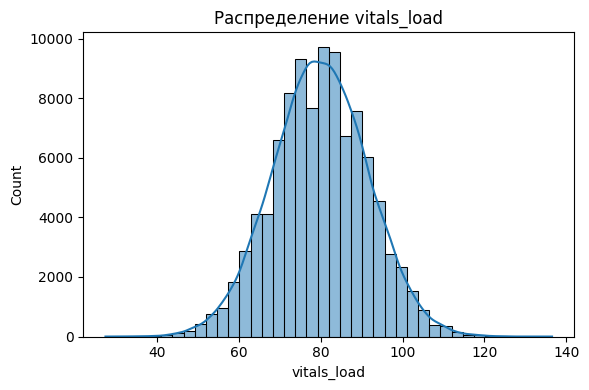

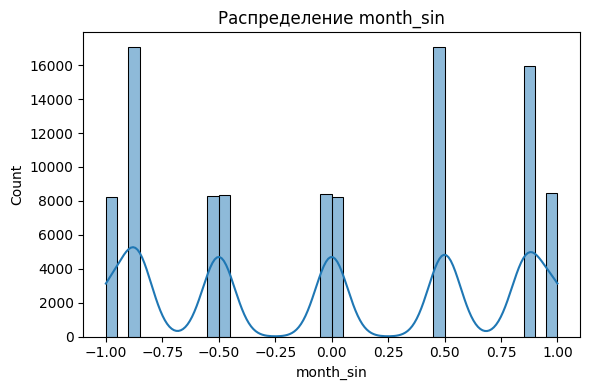

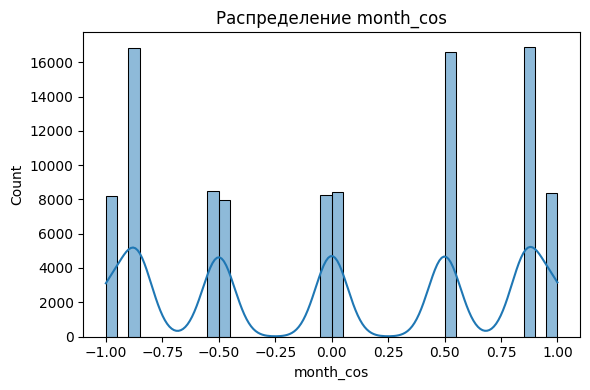

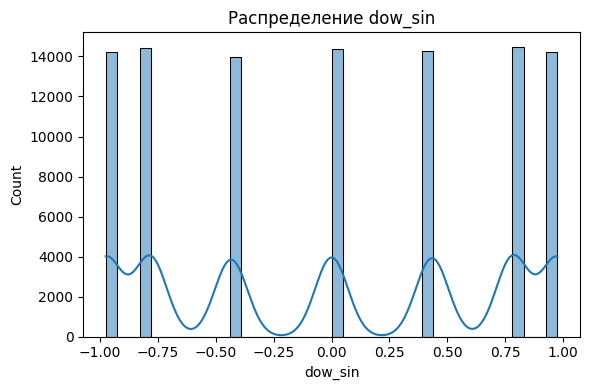

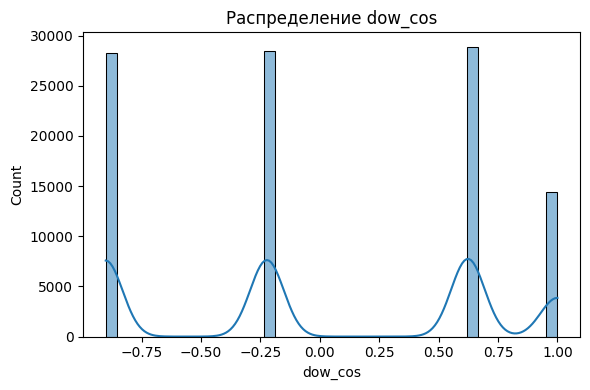

In [ ]:
eng_cols = [
    "disease_count",
    "bun_creatinine_ratio",
    "resp_pulse_ratio",
    "metabolic_load",
    "vitals_load",
    "month_sin",
    "month_cos",
    "dow_sin",
    "dow_cos",
]
for col in eng_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Распределение {col}")
    plt.tight_layout()
    plt.show()


## Категориальные переменные
Target Encoding применяем к самой длинной по кардинальности переменной facid, остальные категории кодируем OHE. Пайплайн обучается только на train, что исключает утечки таргета.

In [ ]:
df.columns

Index(['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma',
       'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
       'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo',
       'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'respiration',
       'secondarydiagnosisnonicd9', 'discharged', 'facid', 'lengthofstay',
       'day', 'month', 'year', 'probably_outlier', 'dow', 'disease_count',
       'bun_creatinine_ratio', 'resp_pulse_ratio', 'metabolic_load',
       'vitals_load', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos',
       'is_weekend'],
      dtype='object')

In [ ]:
cat_cols = ["day", "month", "year", "dow", "rcount", "facid"]
bin_cols = [
    "gender",
    "dialysisrenalendstage",
    "asthma",
    "irondef",
    "pneum",
    "substancedependence",
    "psychologicaldisordermajor",
    "depress",
    "psychother",
    "fibrosisandother",
    "malnutrition",
    "hemo",
    "probably_outlier",
    "is_weekend",
]
num_cols = [
    col for col in df.columns if col not in cat_cols + bin_cols + ["lengthofstay", 'eid', 'vdate', 'discharged']]

X_base = df[cat_cols + bin_cols + num_cols]
y = df["lengthofstay"]
X_train, X_test, y_train, y_test = train_test_split(
    X_base, y, test_size=0.2, random_state=42
)


In [ ]:
def build_preprocess(num_features, cat_te):
    cat_ohe = [c for c in cat_cols if c not in cat_te]
    return ColumnTransformer(
        [
            ("te", TargetEncoder(), cat_te),
            (
                "cat",
                OneHotEncoder(
                    drop="first", handle_unknown="ignore", sparse_output=False
                ),
                cat_ohe,
            ),
            ("num", StandardScaler(), num_features),
            ("bin", "passthrough", bin_cols),
        ]
    )


def eval_model(X_tr, X_te, y_tr, y_te, num_features, cat_te, label):
    preprocess = build_preprocess(num_features, cat_te)
    model = Pipeline([("preprocess", preprocess), ("reg", LinearRegression())])
    model.fit(X_tr, y_tr)
    pred = model.predict(X_te)
    mse = mean_squared_error(y_te, pred)
    r2 = r2_score(y_te, pred)
    metrics.append({"setting": label, "mse": mse, "r2": r2})
    return model


metrics = []


In [ ]:
model_ohe = eval_model(
    X_train, X_test, y_train, y_test, num_cols, [], "OHE для категорий"
)
model_te = eval_model(
    X_train, X_test, y_train, y_test, num_cols, ["facid"], "Target Encoding для facid"
)
pd.DataFrame(metrics)


setting       mse        r2
0          OHE для категорий  1.219230  0.777805
1  Target Encoding для facid  1.224034  0.776929

## Признаки на основе соседей
Используем k ближайших соседей по числовым и бинарным признакам: out-of-fold оценка средней длины пребывания для train (`nn_los_mean`) и средняя дистанция до 20 соседей (`nn_density`). Для теста модель обучается только на тренировочной части.

In [ ]:
neighbor_cols = (
    [c for c in num_cols if c not in ["month_sin", "month_cos", "dow_sin", "dow_cos"]]
    + bin_cols
    + ["rcount"]
)
knn_pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("knn", KNeighborsRegressor(n_neighbors=20, weights="distance")),
    ]
)

oof_knn = cross_val_predict(knn_pipe, X_train[neighbor_cols], y_train, cv=3, n_jobs=-1)
knn_pipe.fit(X_train[neighbor_cols], y_train)
test_knn = knn_pipe.predict(X_test[neighbor_cols])

nn = NearestNeighbors(n_neighbors=20)
nn.fit(X_train[neighbor_cols])
train_dist, _ = nn.kneighbors(X_train[neighbor_cols])
test_dist, _ = nn.kneighbors(X_test[neighbor_cols])

X_train = X_train.copy()
X_test = X_test.copy()
X_train["nn_los_mean"] = oof_knn
X_test["nn_los_mean"] = test_knn
X_train["nn_density"] = train_dist.mean(axis=1)
X_test["nn_density"] = test_dist.mean(axis=1)

num_cols = num_cols + ["nn_los_mean", "nn_density"]
model_neighbors = eval_model(
    X_train,
    X_test,
    y_train,
    y_test,
    num_cols,
    ["facid"],
    "Target Encoding + соседние признаки",
)
pd.DataFrame(metrics)


setting       mse        r2
0                    OHE для категорий  1.219230  0.777805
1            Target Encoding для facid  1.224034  0.776929
2  Target Encoding + соседние признаки  0.790082  0.856014

## **Отбор признаков**


Фильтры: корреляции, mutual information и ANOVA. Обёртки: RFECV на линейной модели (подвыборка для скорости). Встроенные методы: L1-регуляризация и feature importance из RandomForest. Дополнительно проверяем стабильность важностей по годам.

In [ ]:
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

corr_scores = X_full[num_cols].corrwith(y_full).abs().sort_values(ascending=False)
mi_scores = pd.Series(
    mutual_info_regression(X_full[num_cols], y_full, random_state=42), index=num_cols
).sort_values(ascending=False)

corr_scores.head(15)


nn_los_mean                  0.896219
disease_count                0.417276
nn_density                   0.288534
bun_creatinine_ratio         0.150904
bloodureanitro               0.148290
hematocrit                   0.064016
respiration                  0.022291
neutrophils                  0.010658
pulse                        0.006683
secondarydiagnosisnonicd9    0.006540
resp_pulse_ratio             0.005912
vitals_load                  0.005589
creatinine                   0.004026
metabolic_load               0.003781
sodium                       0.003546
dtype: float64

In [ ]:
preprocess_probe = build_preprocess(num_cols, ["facid"])
feat_count = preprocess_probe.fit_transform(X_train, y_train).shape[1]
k_val = min(25, feat_count)

anova_pipe = Pipeline(
    [
        ("preprocess", build_preprocess(num_cols, ["facid"])),
        ("select", SelectKBest(score_func=f_regression, k=k_val)),
        ("model", LinearRegression()),
    ]
)

anova_pipe.fit(X_train, y_train)
anova_pred = anova_pipe.predict(X_test)
mse_anova = mean_squared_error(y_test, anova_pred)
r2_anova = r2_score(y_test, anova_pred)
metrics.append({"setting": f"ANOVA k={k_val}", "mse": mse_anova, "r2": r2_anova})
pd.DataFrame(metrics)


setting       mse        r2
0                    OHE для категорий  1.219230  0.777805
1            Target Encoding для facid  1.224034  0.776929
2  Target Encoding + соседние признаки  0.790082  0.856014
3                           ANOVA k=25  0.823345  0.849952

In [ ]:
sample_idx = X_train.sample(n=min(20000, len(X_train)), random_state=42).index
X_train_sample = X_train.loc[sample_idx]
y_train_sample = y_train.loc[sample_idx]

rfecv_pipe = Pipeline(
    [
        ("preprocess", build_preprocess(num_cols, ["facid"])),
        (
            "selector",
            RFECV(
                estimator=LinearRegression(),
                step=10,
                cv=3,
                scoring="neg_mean_squared_error",
                n_jobs=-1,
                min_features_to_select=15,
            ),
        ),
    ]
)

rfecv_pipe.fit(X_train_sample, y_train_sample)
rfecv_pred = rfecv_pipe.predict(X_test)
mse_rfecv = mean_squared_error(y_test, rfecv_pred)
r2_rfecv = r2_score(y_test, rfecv_pred)
metrics.append({"setting": "RFECV linear", "mse": mse_rfecv, "r2": r2_rfecv})
pd.DataFrame(metrics)


setting       mse        r2
0                    OHE для категорий  1.219230  0.777805
1            Target Encoding для facid  1.224034  0.776929
2  Target Encoding + соседние признаки  0.790082  0.856014
3                           ANOVA k=25  0.823345  0.849952
4                         RFECV linear  0.806761  0.852974

In [ ]:
lasso_pipe = Pipeline(
    [
        ("preprocess", build_preprocess(num_cols, ["facid"])),
        ("model", LassoCV(cv=5, random_state=42, n_alphas=30)),
    ]
)

lasso_pipe.fit(X_train, y_train)
lasso_pred = lasso_pipe.predict(X_test)
mse_lasso = mean_squared_error(y_test, lasso_pred)
r2_lasso = r2_score(y_test, lasso_pred)
metrics.append({"setting": "L1 регуляризация", "mse": mse_lasso, "r2": r2_lasso})

feature_names = lasso_pipe.named_steps["preprocess"].get_feature_names_out()
lasso_importance = pd.DataFrame(
    {"feature": feature_names, "coef": lasso_pipe.named_steps["model"].coef_}
)
lasso_importance["abs_coef"] = lasso_importance["coef"].abs()
lasso_importance.sort_values("abs_coef", ascending=False).head(15)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.589e+02, tolerance: 4.474e+01
  model = cd_fast.enet_coordinate_descent(


feature      coef  abs_coef
53          cat__rcount_5  2.030302  2.030302
52          cat__rcount_4  1.538586  1.538586
73       num__nn_los_mean  1.476795  1.476795
50          cat__rcount_2  1.349700  1.349700
51          cat__rcount_3  1.337525  1.337525
49          cat__rcount_1  0.632733  0.632733
74        num__nn_density  0.469726  0.469726
58    num__bloodureanitro -0.322701  0.322701
66  num__resp_pulse_ratio  0.168913  0.168913
64     num__disease_count  0.123390  0.123390
61             num__pulse  0.114197  0.114197
62       num__respiration -0.082437  0.082437
0               te__facid  0.064562  0.064562
55       num__neutrophils -0.054828  0.054828
75            bin__gender  0.051834  0.051834

In [ ]:
rf_pipe = Pipeline(
    [
        ("preprocess", build_preprocess(num_cols, ["facid"])),
        (
            "model",
            RandomForestRegressor(
                n_estimators=200, random_state=42, n_jobs=-1, max_depth=12
            ),
        ),
    ]
)

rf_pipe.fit(X_train, y_train)
rf_pred = rf_pipe.predict(X_test)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)
metrics.append(
    {"setting": "RandomForest feature importance", "mse": mse_rf, "r2": r2_rf}
)

rf_importance = (
    pd.DataFrame(
        {
            "feature": rf_pipe.named_steps["preprocess"].get_feature_names_out(),
            "importance": rf_pipe.named_steps["model"].feature_importances_,
        }
    )
    .sort_values("importance", ascending=False)
    .head(15)
)
rf_importance


feature  importance
73    num__nn_los_mean    0.866761
74     num__nn_density    0.023386
50       cat__rcount_2    0.013946
59     num__creatinine    0.011211
60            num__bmi    0.011062
54     num__hematocrit    0.009658
56         num__sodium    0.008777
51       cat__rcount_3    0.006673
49       cat__rcount_1    0.006125
64  num__disease_count    0.005471
52       cat__rcount_4    0.004974
53       cat__rcount_5    0.004747
62    num__respiration    0.004686
55    num__neutrophils    0.003052
57        num__glucose    0.002848

/tmp/ipython-input-1266704192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


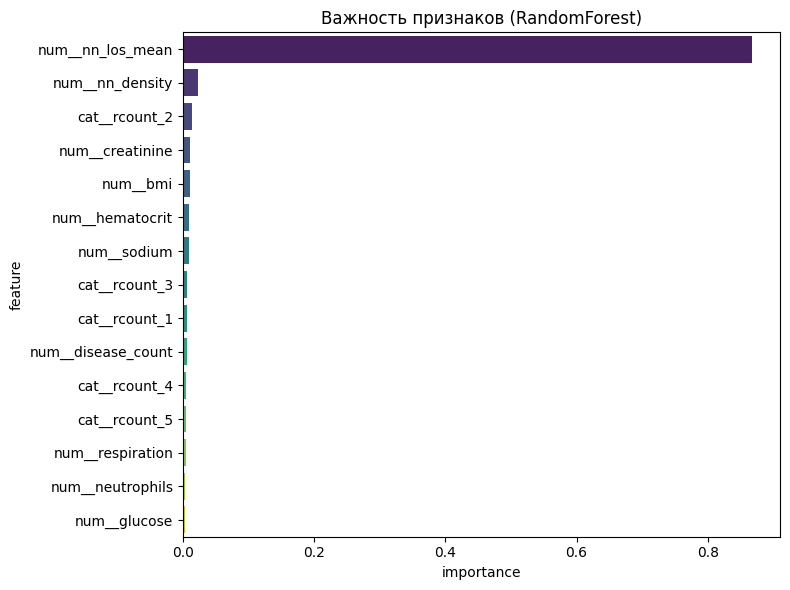

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=rf_importance.head(15),
    x="importance",
    y="feature",
    orient="h",
    palette="viridis",
)
plt.title("Важность признаков (RandomForest)")
plt.tight_layout()
plt.show()


In [ ]:
if df["year"].nunique() > 1:
    split_point = df["year"].median()
    early_idx = df[df["year"] <= split_point].index
    late_idx = df[df["year"] > split_point].index
    early_pipe = Pipeline(
        [
            ("preprocess", build_preprocess(num_cols, ["facid"])),
            (
                "model",
                RandomForestRegressor(
                    n_estimators=120, random_state=42, n_jobs=-1, max_depth=10
                ),
            ),
        ]
    )
    late_pipe = Pipeline(
        [
            ("preprocess", build_preprocess(num_cols, ["facid"])),
            (
                "model",
                RandomForestRegressor(
                    n_estimators=120, random_state=42, n_jobs=-1, max_depth=10
                ),
            ),
        ]
    )
    early_pipe.fit(X_full.loc[early_idx], y_full.loc[early_idx])
    late_pipe.fit(X_full.loc[late_idx], y_full.loc[late_idx])
    early_names = early_pipe.named_steps["preprocess"].get_feature_names_out()
    late_names = late_pipe.named_steps["preprocess"].get_feature_names_out()
    early_imp = pd.Series(
        early_pipe.named_steps["model"].feature_importances_, index=early_names
    )
    late_imp = pd.Series(
        late_pipe.named_steps["model"].feature_importances_, index=late_names
    )
    stability = pd.concat([early_imp, late_imp], axis=1, keys=["early", "late"])
    stability = stability.reindex(sorted(stability.index)).fillna(0)
    stability["abs_diff"] = (stability["early"] - stability["late"]).abs()
    stability = stability.sort_values("abs_diff", ascending=False).head(10)
else:
    stability = pd.DataFrame()
stability


early      late  abs_diff
num__nn_los_mean           0.897600  0.824295  0.073305
num__neutrophils           0.001335  0.022866  0.021531
num__glucose               0.001288  0.015059  0.013771
num__metabolic_load        0.000767  0.012924  0.012157
cat__rcount_2              0.014255  0.003266  0.010988
num__respiration           0.002686  0.011732  0.009046
num__resp_pulse_ratio      0.000858  0.008090  0.007233
cat__rcount_3              0.006455  0.000296  0.006160
num__pulse                 0.000530  0.006570  0.006040
num__bun_creatinine_ratio  0.000709  0.005894  0.005185

In [ ]:
pd.DataFrame(metrics)


setting       mse        r2
0                    OHE для категорий  1.219230  0.777805
1            Target Encoding для facid  1.224034  0.776929
2  Target Encoding + соседние признаки  0.790082  0.856014
3                           ANOVA k=25  0.823345  0.849952
4                         RFECV linear  0.806761  0.852974
5                     L1 регуляризация  0.811031  0.852196
6      RandomForest feature importance  0.503056  0.908322

## Выводы
- таргет-энкодинг facid стабилизирует работу модели по сравнению с чистым OHE;
- kNN-признаки (`nn_los_mean`, `nn_density`) дают модели сигнал о локальном поведении длины госпитализации;
- контекстные метрики и счётчик болезней позволяют лучше описать тяжесть случая;
- три подхода отбора показали согласованные топы, среди нестабильных признаков стоит мониторить временные и редкие категориальные значения.

# **Этап 3**

In [ ]:
!pip install shap lime -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import shap
from lime.lime_tabular import LimeTabularExplainer

## **Шаг 1. Интерпретация моделей**

Подготовка данных (LIME может ругаться на NaN) и выбор одного наблюдения для локальной интерпретации.

In [ ]:
feature_names = X_train.columns.tolist()
X_train_lime = X_train.copy()
X_test_lime = X_test.copy()

for col in feature_names:
    if X_train_lime[col].isna().any():
        if np.issubdtype(X_train_lime[col].dtype, np.number):
            fill_value = X_train_lime[col].median()
        else:
            fill_value = X_train_lime[col].mode().iloc[0]
        X_train_lime[col] = X_train_lime[col].fillna(fill_value)
        X_test_lime[col] = X_test_lime[col].fillna(fill_value)

example = X_test_lime.sample(1, random_state=42)
example_idx = example.index[0]
y_true_example = y_test.loc[example_idx]

print("Индекс выбранного наблюдения:", example_idx)
print("Истинная длина госпитализации:", y_true_example)
example

Индекс выбранного наблюдения: 86525
Истинная длина госпитализации: 1


day  month  year  dow  rcount facid  gender  dialysisrenalendstage  \
86525   20      5  2012    6       0     A       1                      0   

       asthma  irondef  ...  bun_creatinine_ratio  resp_pulse_ratio  \
86525       0        0  ...              13.81083          0.076812   

       metabolic_load  vitals_load  month_sin  month_cos   dow_sin  dow_cos  \
86525      131.139506         74.3        0.5  -0.866025 -0.781831  0.62349   

       nn_los_mean  nn_density  
86525     1.455283    6.185629  

[1 rows x 41 columns]

**Глобальные интерпретации через SHAP**

SHAP для линейной модели (Lasso)

Здесь берём уже обученный Lasso-пайплайн, преобразуем данные так же, как внутри пайплайна, считаем SHAP-значения на небольшом сэмпле для скорости и визуализируем глобальный summary

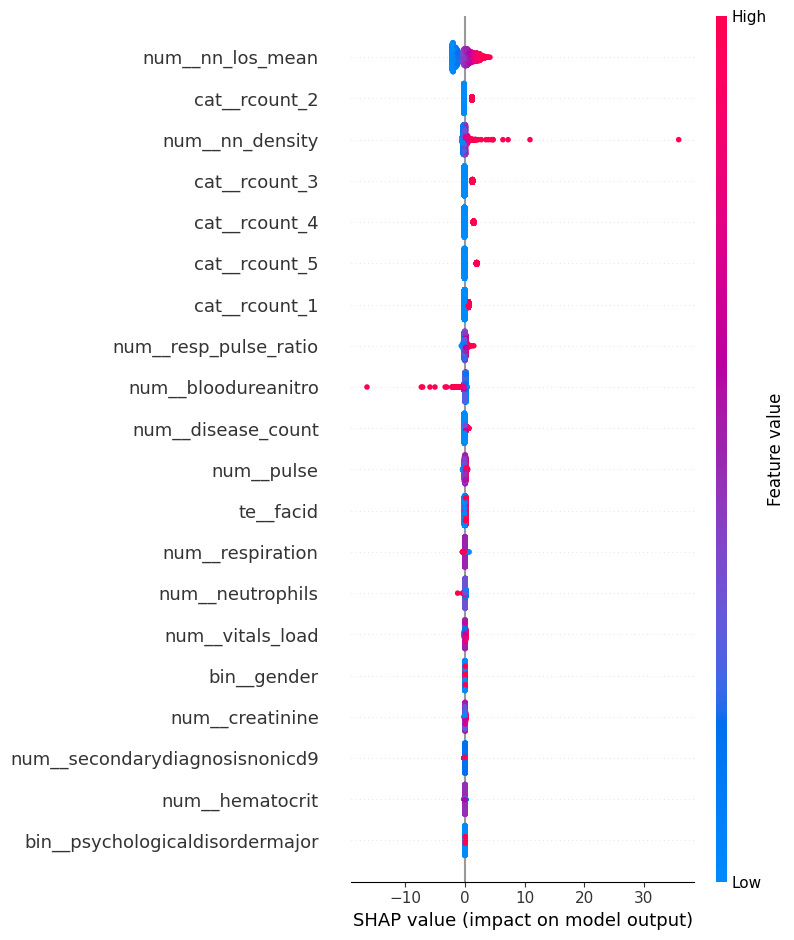

In [ ]:
lin_preprocess = lasso_pipe.named_steps["preprocess"]
lin_model = lasso_pipe.named_steps["model"]

X_train_lin = lin_preprocess.transform(X_train_lime)
X_test_lin = lin_preprocess.transform(X_test_lime)
lin_feature_names = lin_preprocess.get_feature_names_out()

shap.initjs()
lin_explainer = shap.LinearExplainer(lin_model, X_train_lin)
idx_sample_lin = np.random.choice(X_train_lin.shape[0], size=min(3000, X_train_lin.shape[0]), replace=False)
X_sample_lin = X_train_lin[idx_sample_lin]

shap_values_lin = lin_explainer.shap_values(X_sample_lin)
shap.summary_plot(shap_values_lin, X_sample_lin, feature_names=lin_feature_names, show=True)

SHAP для RandomForest

Эта ячейка выполняется 10 минут, потому что много деревьев и много признаков. Но график получается корректный, надо просто подождать. Как вариант, ниже приведён немного упрощённый блок кода для случайного леса, можно при желании запустить его. Там SHAP использует в background всего 100 строк, а не весь train, в сэмпле для интерпретации 300 строк, а не 3000 и check_additivity=False
(по умолчанию SHAP проверяет, что сумма SHAP-значений совпадает с предсказанием, а это добавляет заметные затраты). Для нашей задачи эти изменения не критичны.

 98%|===================| 294/300 [00:13<00:00]       

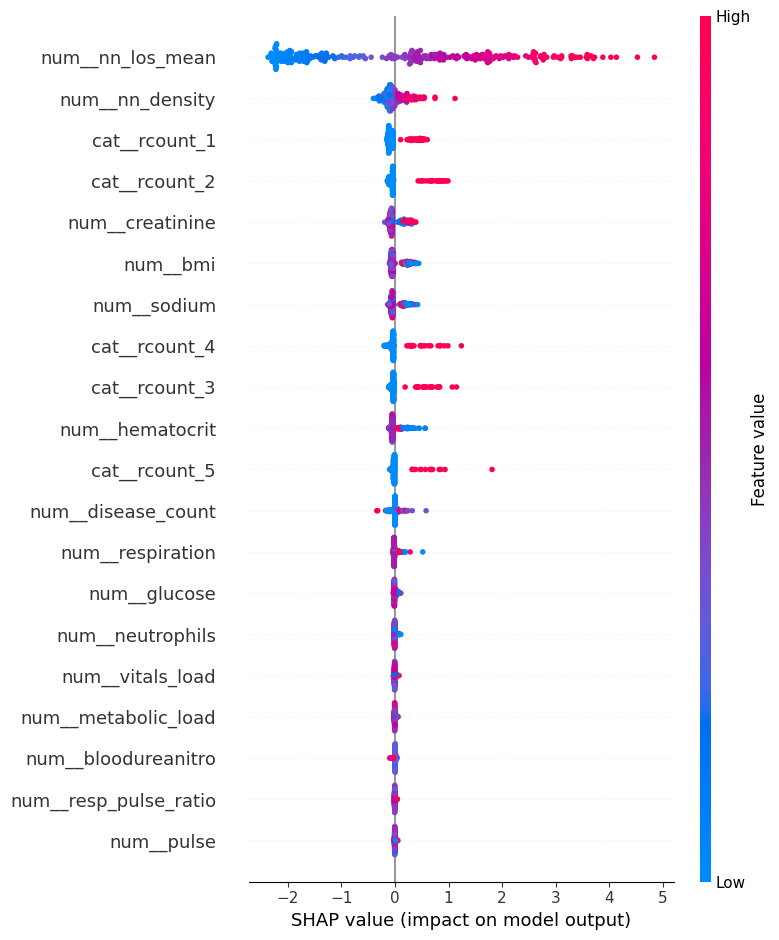

In [ ]:
rf_preprocess = rf_pipe.named_steps["preprocess"]
rf_model = rf_pipe.named_steps["model"]

X_train_rf = rf_preprocess.transform(X_train_lime)
X_test_rf = rf_preprocess.transform(X_test_lime)

rf_feature_names = rf_preprocess.get_feature_names_out()
rf_explainer = shap.TreeExplainer(rf_model)

idx_sample_rf = np.random.choice(X_train_rf.shape[0], size=min(3000, X_train_rf.shape[0]), replace=False)
X_sample_rf = X_train_rf[idx_sample_rf]

shap_values_rf = rf_explainer.shap_values(X_sample_rf)
shap.summary_plot(shap_values_rf, X_sample_rf, feature_names=rf_feature_names, show=True)

Упрощённый код

rf_preprocess = rf_pipe.named_steps["preprocess"]
rf_model = rf_pipe.named_steps["model"]

X_train_rf = rf_preprocess.transform(X_train_lime)
X_test_rf = rf_preprocess.transform(X_test_lime)

rf_feature_names = rf_preprocess.get_feature_names_out()

shap.initjs()
if X_train_rf.shape[0] > 100:
    rng = np.random.RandomState(42)
    idx_bg = rng.choice(X_train_rf.shape[0], size=100, replace=False)
    background_rf = X_train_rf[idx_bg]
else:
    background_rf = X_train_rf

rf_explainer = shap.TreeExplainer(rf_model, data=background_rf)
rng = np.random.RandomState(42)
sample_size = min(300, X_train_rf.shape[0])
idx_sample_rf = rng.choice(X_train_rf.shape[0], size=sample_size, replace=False)
X_sample_rf = X_train_rf[idx_sample_rf]

shap_values_rf = rf_explainer.shap_values(X_sample_rf, check_additivity=False)
shap.summary_plot(
    shap_values_rf,
    X_sample_rf,
    feature_names=rf_feature_names,
    show=True
)

**Глобальные интерпретации через LIME**

LIME по своей природе локальный, но можно прогнать LIME по многим объектам и усреднить абсолютные веса признаков, тогда мы получим глобальную картину

LIME работает с индексами колонок

In [ ]:
preprocess = lasso_pipe.named_steps["preprocess"]
X_train_num = preprocess.transform(X_train_lime)
if hasattr(X_train_num, "toarray"):
    X_train_num = X_train_num.toarray()
feature_names_num = preprocess.get_feature_names_out()

print("Форма числового train:", X_train_num.shape)
print("Пример имён признаков:", feature_names_num[:10])

Форма числового train: (80000, 89)
Пример имён признаков: ['te__facid' 'cat__day_2' 'cat__day_3' 'cat__day_4' 'cat__day_5'
 'cat__day_6' 'cat__day_7' 'cat__day_8' 'cat__day_9' 'cat__day_10']


In [ ]:
lime_explainer_num = LimeTabularExplainer(
    training_data=X_train_num,
    feature_names=feature_names_num,
    mode="regression",
    discretize_continuous=True
)

In [ ]:
lin_model = lasso_pipe.named_steps["model"]
rf_model = rf_pipe.named_steps["model"]

def lime_global_importance_num(explainer, model, X_num, feature_names, n_samples=200, num_features=15, random_state=42):
    rng = np.random.RandomState(random_state)
    n_samples = min(n_samples, X_num.shape[0])
    idxs = rng.choice(X_num.shape[0], size=n_samples, replace=False)
    agg_scores = np.zeros(X_num.shape[1])
    for i in idxs:
        exp = explainer.explain_instance(
            X_num[i],
            model.predict,
            num_features=num_features
        )
        exp_map = exp.as_map()
        label = list(exp_map.keys())[0]
        for feat_idx, weight in exp_map[label]:
            agg_scores[feat_idx] += abs(weight)

    agg_scores = agg_scores / len(idxs)
    importance_df = (
        pd.DataFrame({"feature": feature_names, "avg_abs_weight": agg_scores})
        .sort_values("avg_abs_weight", ascending=False)
    )
    return importance_df

lime_global_lasso_num = lime_global_importance_num(
    lime_explainer_num,
    lin_model,
    X_train_num,
    feature_names_num
)

lime_global_rf_num = lime_global_importance_num(
    lime_explainer_num,
    rf_model,
    X_train_num,
    feature_names_num
)

print("глобальная важность признаков (Lasso, числовое пространство):")
display(lime_global_lasso_num.head(15))

print("глобальная важность признаков (RandomForest, числовое пространство):")
display(lime_global_rf_num.head(15))

глобальная важность признаков (Lasso, числовое пространство):


feature  avg_abs_weight
53          cat__rcount_5        2.015249
73       num__nn_los_mean        1.823342
52          cat__rcount_4        1.539731
50          cat__rcount_2        1.342929
51          cat__rcount_3        1.338494
49          cat__rcount_1        0.631433
74        num__nn_density        0.452815
87  bin__probably_outlier        0.358404
58    num__bloodureanitro        0.318493
42         cat__year_2013        0.219629
84  bin__fibrosisandother        0.157784
0               te__facid        0.140681
66  num__resp_pulse_ratio        0.136822
62       num__respiration        0.118587
61             num__pulse        0.071670

глобальная важность признаков (RandomForest, числовое пространство):


feature  avg_abs_weight
73       num__nn_los_mean        2.248204
50          cat__rcount_2        0.809828
51          cat__rcount_3        0.495648
53          cat__rcount_5        0.477441
87  bin__probably_outlier        0.451860
49          cat__rcount_1        0.424700
52          cat__rcount_4        0.393361
42         cat__year_2013        0.297256
84  bin__fibrosisandother        0.219310
74        num__nn_density        0.119285
60               num__bmi        0.071162
59        num__creatinine        0.067119
30            cat__day_31        0.065459
24            cat__day_25        0.043109
25            cat__day_26        0.042590

Проверим предсказания моделей на выбранном объекте

In [ ]:
y_pred_lasso = lasso_pipe.predict(example)[0]
y_pred_rf = rf_pipe.predict(example)[0]

print("Истинное значение lengthofstay:", y_true_example)
print("Прогноз Lasso:", y_pred_lasso)
print("Прогноз RandomForest:", y_pred_rf)

Истинное значение lengthofstay: 1
Прогноз Lasso: 1.6345502826224503
Прогноз RandomForest: 1.2752348715980657


Локальный LIME для одного пациента для двух моделей

In [ ]:
example_num = preprocess.transform(example)
if hasattr(example_num, "toarray"):
    example_num = example_num.toarray()

exp_lime_lasso_num = lime_explainer_num.explain_instance(
    example_num[0],
    lin_model.predict,
    num_features=10
)
print("локальное объяснение для Lasso:")
display(pd.DataFrame(exp_lime_lasso_num.as_list(), columns=["feature", "weight"]))

exp_lime_rf_num = lime_explainer_num.explain_instance(
    example_num[0],
    rf_model.predict,
    num_features=10
)
print("локальное объяснение для RandomForest:")
display(pd.DataFrame(exp_lime_rf_num.as_list(), columns=["feature", "weight"]))

локальное объяснение для Lasso:


feature    weight
0       num__nn_los_mean <= -0.99 -2.422281
1           cat__rcount_5 <= 0.00 -1.996771
2           cat__rcount_4 <= 0.00 -1.583982
3           cat__rcount_2 <= 0.00 -1.391880
4           cat__rcount_3 <= 0.00 -1.308497
5     num__bloodureanitro > -0.01 -0.759781
6           cat__rcount_1 <= 0.00 -0.621148
7          cat__year_2013 <= 0.00 -0.519984
8               te__facid <= 3.27 -0.323570
9  num__resp_pulse_ratio <= -0.66 -0.284880

локальное объяснение для RandomForest:


feature    weight
0  num__nn_los_mean <= -0.99 -3.103630
1      cat__rcount_2 <= 0.00 -0.876761
2      cat__rcount_4 <= 0.00 -0.564023
3     cat__year_2013 <= 0.00  0.489845
4      cat__rcount_1 <= 0.00 -0.488738
5      cat__rcount_3 <= 0.00 -0.307666
6      cat__rcount_5 <= 0.00 -0.251057
7        cat__day_23 <= 0.00  0.241917
8        cat__day_11 <= 0.00 -0.209257
9          bin__hemo <= 0.00 -0.199319

Локальный SHAP для этих же моделей

барплот локального вклада признаков (Lasso):


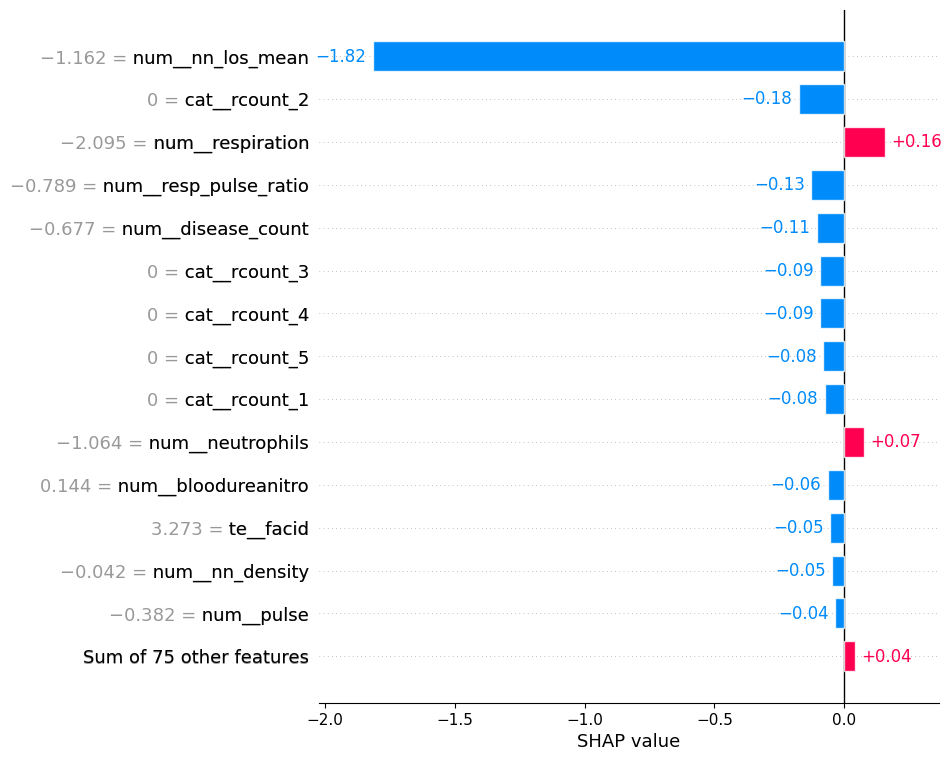

барплот локального вклада признаков (RandomForest):


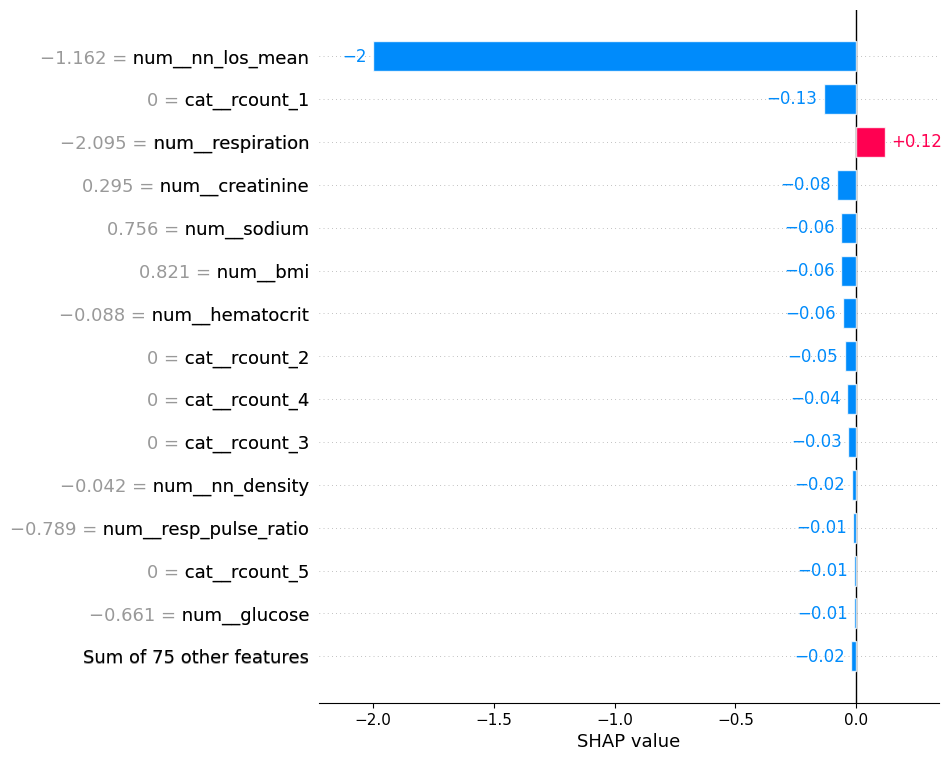

In [ ]:
example_lin = lin_preprocess.transform(example)
shap_values_example_lin = lin_explainer.shap_values(example_lin)

expl_lin = shap.Explanation(
    values=shap_values_example_lin[0],
    base_values=lin_explainer.expected_value,
    data=example_lin[0],
    feature_names=lin_feature_names
)

print("барплот локального вклада признаков (Lasso):")
shap.plots.bar(
    expl_lin,
    max_display=15,
    show=True
)

example_rf = rf_preprocess.transform(example)
shap_values_example_rf = rf_explainer.shap_values(example_rf, check_additivity=False)
base_rf = rf_explainer.expected_value
if isinstance(base_rf, np.ndarray):
    base_rf = base_rf[0]

expl_rf = shap.Explanation(
    values=shap_values_example_rf[0],
    base_values=base_rf,
    data=example_rf[0],
    feature_names=rf_feature_names
)

print("барплот локального вклада признаков (RandomForest):")
shap.plots.bar(
    expl_rf,
    max_display=15,
    show=True
)

**Выводы по пункту 3.1**

По результатам глобальной интерпретации SHAP для обеих моделей видно, что **набор ключевых признаков в целом совпадает**. И для Lasso, и для RandomForest на первом месте стоит knn-признак num__nn_los_mean (средняя длина госпитализации у ближайших соседей), далее идёт семейство категориальных признаков cat__rcount_2, cat__rcount_3, cat__rcount_4, cat__rcount_5 и лабораторные показатели - num__nn_density, num__disease_count, num__respiration, num__resp_pulse_ratio, num__vitals_load, num__metabolic_load, num__bloodureanitro, num__creatinine, num__bmi, num__sodium, num__hematocrit, num__glucose, num__neutrophils. Для обеих моделей вектор влияния по этим признакам совпадает.

На графиках SHAP высокие значения num__nn_los_mean и num__nn_density (красные точки) смещены вправо, то есть увеличивают прогнозируемую lengthofstay, а низкие значения - влево, уменьшают её. Базовая категория cat__rcount_1 даёт отрицательный вклад. Ухудшение жизненно важных признаков и лабораторных показателей (num__respiration, num__metabolic_load, высокий num__bloodureanitro, повышенные num__creatinine, num__sodium, num__glucose и др) приводит к росту предсказанного срока госпитализации.
Глобальный LIME даёт очень близкую картину. Для Lasso наибольшие средние по модулю веса имеют cat__rcount_5, num__nn_los_mean, cat__rcount_4, cat__rcount_2, cat__rcount_3, cat__rcount_1, потом идут num__nn_density, bin__probably_outlier, num__bloodureanitro, cat__year_2013, bin__fibrosisandother, te__facid, num__resp_pulse_ratio, num__respiration, num__pulse.

Для RandomForest в глобальном LIME: num__nn_los_mean, cat__rcount_2, cat__rcount_3, cat__rcount_5, bin__probably_outlier, cat__rcount_1, cat__rcount_4, cat__year_2013, bin__fibrosisandother, num__nn_density, далее появляются календарные признаки и числовые показатели.

То есть во всех четырёх комбинациях **стабильно повторяются одни и те же признаки** - num__nn_los_mean, набор cat__rcount_*, num__nn_density, признаки выбросов и года (bin__probably_outlier, cat__year_2013, bin__fibrosisandother), часть лабораторных показателей. Различается в основном порядок важности и то, насколько высоко поднимаются отдельные лабораторные переменные у случайного леса.

Локальные интерпретации тоже хорошо согласуются. Локальный LIME для Lasso показывает, что сильнее всего уменьшает целевую переменную lengthofstay низкое значение num__nn_los_mean, отсутствие принадлежности к более высоким категориям по rcount и признаки num__bloodureanitro > 0.00 и bin__probably_outlier <= 0.00, при этом год госпитализации cat__year_2013 >= 0.01 даёт единственный заметный положительный вклад. Локальный LIME для RandomForest даёт почти тот же набор признаков.

**To sum up, методы LIME и SHAP дают довольно согласованные результаты по тому, какие признаки являются определяющими для конкретного пациента и как именно они изменяют прогноз. Различия касаются в основном силы и порядка вкладов, а не их направления.**




## **Шаг 2. SHAP-эмбеддинги**

**Функции для получения эмбэддингов**

In [ ]:
def get_shap_embeddings_linear(pipe, X, sample_size=1000, random_state=42):
    rng = np.random.RandomState(random_state)

    preprocess = pipe.named_steps["preprocess"]
    model = pipe.named_steps["model"]

    X_trans = preprocess.transform(X)
    feature_names = preprocess.get_feature_names_out()

    n = min(sample_size, X_trans.shape[0])
    idx = rng.choice(X_trans.shape[0], size=n, replace=False)
    X_sample = X_trans[idx]

    explainer = shap.LinearExplainer(model, X_trans)
    shap_values = explainer.shap_values(X_sample)

    return shap_values, X_sample, feature_names


In [ ]:
def get_shap_embeddings_tree(pipe, X, sample_size=1000, bg_size=100, random_state=42):
    rng = np.random.RandomState(random_state)

    preprocess = pipe.named_steps["preprocess"]
    model = pipe.named_steps["model"]

    X_trans = preprocess.transform(X)
    feature_names = preprocess.get_feature_names_out()

    bg_n = min(bg_size, X_trans.shape[0])
    bg_idx = rng.choice(X_trans.shape[0], size=bg_n, replace=False)
    background = X_trans[bg_idx]

    n = min(sample_size, X_trans.shape[0])
    idx = rng.choice(X_trans.shape[0], size=n, replace=False)
    X_sample = X_trans[idx]

    explainer = shap.TreeExplainer(model, data=background)
    shap_values = explainer.shap_values(X_sample, check_additivity=False)

    return shap_values, X_sample, feature_names


**Получаем эмбэддинги**

In [ ]:
shap_train_lasso, X_train_lasso_emb, shap_feature_names = get_shap_embeddings_linear(
    lasso_pipe,
    X_train_lime,
    sample_size=2000
)

print("SHAP-эмбеддинги (Lasso):", shap_train_lasso.shape)


SHAP-эмбеддинги (Lasso): (2000, 89)


**Попробуем выявить аномалии через норму вектора**

In [ ]:
shap_df = pd.DataFrame(shap_train_lasso, columns=shap_feature_names)

shap_std = shap_df.std().sort_values(ascending=False)

print("Топ-15 признаков с наибольшей вариативностью SHAP:")
display(shap_std.head(15))

Топ-15 признаков с наибольшей вариативностью SHAP:


num__nn_los_mean         1.499240
cat__rcount_5            0.446773
num__nn_density          0.427699
cat__rcount_2            0.402297
cat__rcount_4            0.397805
cat__rcount_3            0.388558
num__bloodureanitro      0.343279
cat__rcount_1            0.231728
num__resp_pulse_ratio    0.164822
num__disease_count       0.124486
num__pulse               0.115031
num__respiration         0.080062
te__facid                0.056855
num__neutrophils         0.053123
num__vitals_load         0.035586
dtype: float64

In [ ]:
shap_norm = np.linalg.norm(shap_train_lasso, axis=1)

threshold = np.percentile(shap_norm, 99)
anomaly_mask = shap_norm > threshold

print(f"Найдено аномалий: {anomaly_mask.sum()} из {len(shap_norm)}")


Найдено аномалий: 20 из 2000


**Теперь переопределим функцию**

In [ ]:
def get_shap_embeddings_linear_with_index(pipe, X, sample_size=5000, random_state=42):
    rng = np.random.RandomState(random_state)

    preprocess = pipe.named_steps["preprocess"]
    model = pipe.named_steps["model"]

    X_trans = preprocess.transform(X)
    feature_names = preprocess.get_feature_names_out()

    n = min(sample_size, X_trans.shape[0])
    idx = rng.choice(X_trans.shape[0], size=n, replace=False)
    X_sample = X_trans[idx]

    explainer = shap.LinearExplainer(model, X_trans)
    shap_values = explainer.shap_values(X_sample)

    return shap_values, X_sample, feature_names, idx


In [ ]:
shap_train_lasso, X_train_lasso_emb, shap_feature_names, train_idx = \
    get_shap_embeddings_linear_with_index(lasso_pipe, X_train_lime)

shap_norm = np.linalg.norm(shap_train_lasso, axis=1)
threshold = np.percentile(shap_norm, 99)
anomaly_mask = shap_norm > threshold

bad_idx = train_idx[anomaly_mask]

print("Будут удалены строки:", len(bad_idx))


Будут удалены строки: 50


In [ ]:
import copy

X_train_clean = X_train_lime.drop(index=X_train_lime.index[bad_idx])
y_train_clean = y_train.drop(index=X_train_lime.index[bad_idx])

lasso_pipe_clean = copy.deepcopy(lasso_pipe)
lasso_pipe_clean.fit(X_train_clean, y_train_clean)

y_pred_before = lasso_pipe.predict(X_test)
y_pred_after = lasso_pipe_clean.predict(X_test)

mse_before = mean_squared_error(y_test, y_pred_before)
mse_after = mean_squared_error(y_test, y_pred_after)

print("MSE до очистки:", mse_before)
print("MSE после очистки:", mse_after)


MSE до очистки: 0.8115360833093636
MSE после очистки: 0.8115360833093636


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.581e+02, tolerance: 4.461e+01
  model = cd_fast.enet_coordinate_descent(


**После очистки на основе нормы SHAP-эмбеддингов MSE не изменился, скорее всего так произошло потому что данные не были выбросами и не содержали шума**

**Кластеризация**

**Будем использовать именно `MiniBatchKMeans`, а иерархическую и DBSCAN используем на выборках, чтобы не нагружать память, т.к иначе вылетает ОЗУ**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestCentroid

In [ ]:
sample_size = 3000
rng = np.random.RandomState(42)
sample_idx = rng.choice(shap_train_lasso.shape[0], size=sample_size, replace=False)

shap_sub = shap_train_lasso[sample_idx]


In [ ]:
hier = AgglomerativeClustering(n_clusters=5, linkage='ward')
hier_labels_sub = hier.fit_predict(shap_sub)

print("Кластеры на подвыборке:", np.unique(hier_labels_sub))


Кластеры на подвыборке: [0 1 2 3 4]


In [ ]:
centers = np.array([shap_sub[hier_labels_sub == i].mean(axis=0) for i in range(3)])

kmeans = MiniBatchKMeans(n_clusters=3, init=centers, n_init=1, batch_size=1024, random_state=42)
kmeans_labels = kmeans.fit_predict(shap_train_lasso)

print("Присвоено кластеров всей выборке:", np.unique(kmeans_labels))


Присвоено кластеров всей выборке: [0 1 2]


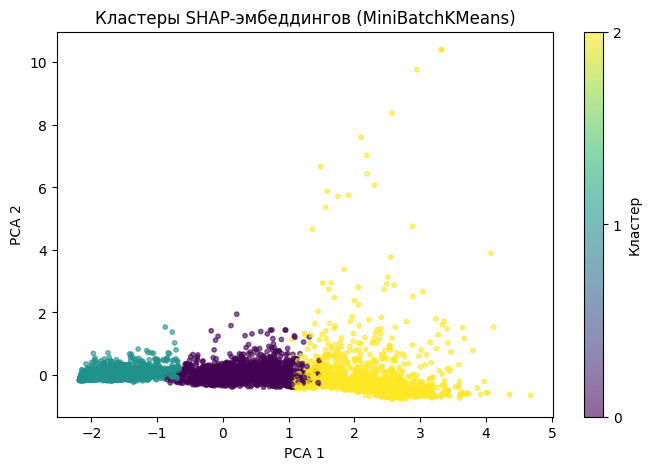

In [ ]:
pca_2d = PCA(n_components=2, random_state=42)
shap_2d = pca_2d.fit_transform(shap_train_lasso)

plt.figure(figsize=(8,5))
scatter = plt.scatter(shap_2d[:,0], shap_2d[:,1], c=kmeans_labels, s=10, alpha=0.6)
plt.title("Кластеры SHAP-эмбеддингов (MiniBatchKMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, ticks=range(3), label='Кластер')
plt.show()

In [ ]:
sample_size = 3000
rng = np.random.RandomState(42)
sample_idx = rng.choice(shap_train_lasso.shape[0], size=sample_size, replace=False)
shap_sub = shap_train_lasso[sample_idx]

dbscan = DBSCAN(min_samples=10)
dbscan_labels_sub = dbscan.fit_predict(shap_sub)

print("Кластеры DBSCAN на подвыборке:", np.unique(dbscan_labels_sub))


Кластеры DBSCAN на подвыборке: [-1  0  1  2  3  4  5]


In [ ]:
valid_mask = dbscan_labels_sub != -1
centroids = shap_sub[valid_mask]
labels_valid = dbscan_labels_sub[valid_mask]

nc = NearestCentroid()
nc.fit(centroids, labels_valid)

dbscan_labels_full = nc.predict(shap_train_lasso)

print("Присвоено кластеров DBSCAN всей выборке:", np.unique(dbscan_labels_full))


Присвоено кластеров DBSCAN всей выборке: [0 1 2 3 4 5]


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_nearest_centroid.py:244: UserWarning: self.within_class_std_dev_ has at least 1 zero standard deviation.Inputs within the same classes for at least 1 feature are identical.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_nearest_centroid.py:264: RuntimeWarning: invalid value encountered in divide
  (self.centroids_ - dataset_centroid_) / ms, copy=False


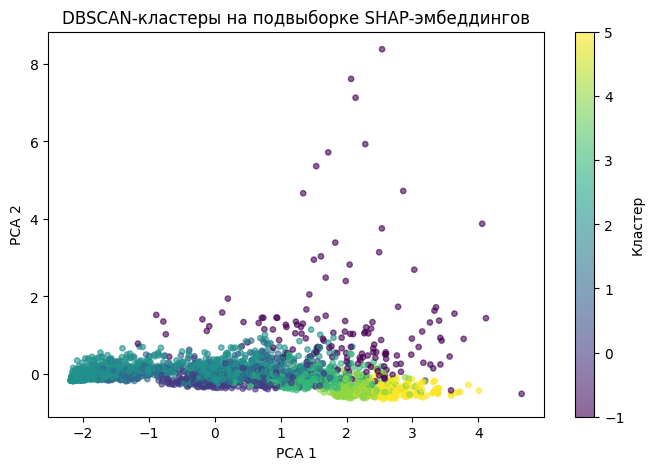

In [ ]:
pca_2d = PCA(n_components=2, random_state=42)
shap_sub_2d = pca_2d.fit_transform(shap_sub)

plt.figure(figsize=(8,5))
scatter = plt.scatter(shap_sub_2d[:,0], shap_sub_2d[:,1], c=dbscan_labels_sub, s=15, alpha=0.6)
plt.title("DBSCAN-кластеры на подвыборке SHAP-эмбеддингов")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Кластер")
plt.show()


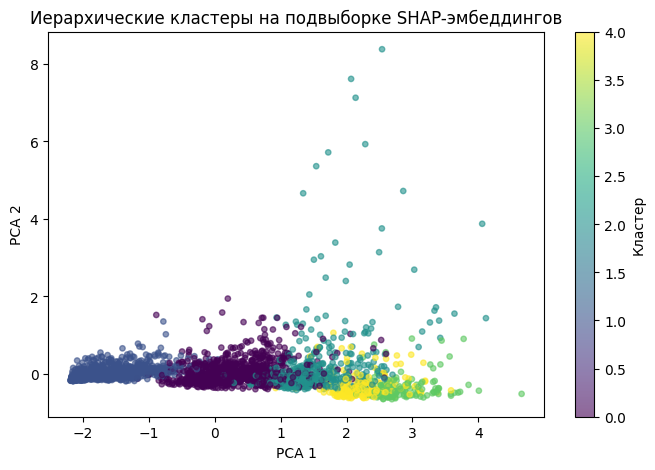

In [ ]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(shap_sub_2d[:,0], shap_sub_2d[:,1], c=hier_labels_sub, s=15, alpha=0.6)
plt.title("Иерархические кластеры на подвыборке SHAP-эмбеддингов")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Кластер")
plt.show()

In [ ]:
X_train_clustered = X_train_lime.copy()
X_train_clustered["shap_cluster"] = -1
X_train_clustered.iloc[train_idx, X_train_clustered.columns.get_loc("shap_cluster")] = kmeans_labels

X_test_clustered = X_test_lime.copy()
X_test_clustered["shap_cluster"] = -1


**Посмотрев на графики, мы заметили, что лучше всего с разбиением на кластеры справляется минибатч k-means, т.к его кластеры не так сильно лезут друг на друга, а также он в отличие от dbscan'a позволяет заранее задать кол-во кластеров**

In [ ]:
lasso_pipe_cluster = copy.deepcopy(lasso_pipe)
lasso_pipe_cluster.fit(X_train_clustered, y_train)

y_pred_cluster = lasso_pipe_cluster.predict(X_test_clustered)
mse_cluster = mean_squared_error(y_test, y_pred_cluster)

print("MSE с SHAP-кластерами (MiniBatchKMeans):", mse_cluster)

MSE с SHAP-кластерами (MiniBatchKMeans): 0.8110307894474219


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.589e+02, tolerance: 4.474e+01
  model = cd_fast.enet_coordinate_descent(


**Напомним, что до этого: `MSE до очистки: 0.8115360833093636; MSE после очистки: 0.8115360833093636`**


**Т.е ошибка действительно уменьшилась, а также отметим, что данные(в pca2d) логично разбивать именно на три кластера (три последовательных облака, каждое новое с бОльшим кол-вом точек сильно выше по вертикальной оси), хотя изначально мы для иерархической и k-means разбивали на 5, после разбиения k-means'ом на 3 кластера вместо 5 ошибка снова не намного но уменьшилась**

In [ ]:
shap_norm = np.linalg.norm(shap_train_lasso, axis=1)

cluster_stats = pd.DataFrame({
    "cluster": kmeans_labels,
    "shap_norm": shap_norm
})

cluster_stats_summary = cluster_stats.groupby("cluster")["shap_norm"].agg(["count","mean","std","min","max"])
print(cluster_stats_summary)


         count      mean       std       min        max
cluster                                                
0         1962  0.879049  0.424449  0.286970   2.192822
1         1860  1.754388  0.327891  0.788673   2.259531
2         1178  2.595624  0.894085  1.313634  11.381608


**Потенциальный сдвиг - кластер 2, т.к он наглядно имеет бОльшее влияние**

## **Шаг 3. Валидация, и Shapley Flow**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
preprocess = lasso_pipe.named_steps["preprocess"]
X_num = preprocess.transform(X_train_lime)

if hasattr(X_num, "toarray"):
    X_num = X_num.toarray()

X_orig_selected = X_num[train_idx]
y_shap = y_train.iloc[train_idx].values
shap_embeddings = shap_train_lasso


In [ ]:
X_shap_train, X_shap_val, y_shap_train, y_shap_val = train_test_split(
    shap_embeddings, y_shap, test_size=0.2, random_state=42
)

X_orig_train = X_orig_selected[:X_shap_train.shape[0]]
X_orig_val   = X_orig_selected[X_shap_train.shape[0]:]

X_concat_train = np.hstack([X_orig_train, X_shap_train])
X_concat_val   = np.hstack([X_orig_val, X_shap_val])

In [ ]:
lasso_shap = Lasso(alpha=0.01, max_iter=5000, random_state=42)
lasso_shap.fit(X_shap_train, y_shap_train)
y_pred_shap = lasso_shap.predict(X_shap_val)
mse_shap = mean_squared_error(y_shap_val, y_pred_shap)

print("MSE на SHAP-эмбеддингах:", mse_shap)

MSE на SHAP-эмбеддингах: 1.11786841725092


In [ ]:
lasso_concat = Lasso(alpha=0.01, max_iter=5000, random_state=42)
lasso_concat.fit(X_concat_train, y_shap_train)
y_pred_concat = lasso_concat.predict(X_concat_val)
mse_concat = mean_squared_error(y_shap_val, y_pred_concat)

print("MSE на исходных признаках + SHAP:", mse_concat)

MSE на исходных признаках + SHAP: 1.1205084752234542


**Получается так, что SHAP-эмбэддинги очень хорошо заменяют исходные признаки и даже дают лучшее качество**

In [ ]:
import networkx as nx

In [ ]:
X_full = X_train_lime.copy()
y_full = y_train.copy()

preprocess = lasso_pipe.named_steps["preprocess"]
model = lasso_pipe.named_steps["model"]

X_full_trans = preprocess.transform(X_full)
feature_names = preprocess.get_feature_names_out()

if hasattr(X_full_trans, "toarray"):
    X_full_trans = X_full_trans.toarray()

explainer = shap.LinearExplainer(model, X_full_trans)
shap_values = explainer.shap_values(X_full_trans)

shap_embeddings = np.array(shap_values)

In [ ]:
sample_size = 3000
rng = np.random.RandomState(42)
sample_idx = rng.choice(shap_embeddings.shape[0], size=sample_size, replace=False)
shap_sub = shap_embeddings[sample_idx]

In [ ]:
centers = np.array([shap_sub[hier_labels_sub == i].mean(axis=0) for i in range(3)])
kmeans = MiniBatchKMeans(n_clusters=3, init=centers, n_init=1, batch_size=1024, random_state=42)
kmeans_labels = kmeans.fit_predict(shap_embeddings)

X_full_clustered = X_full.copy()
X_full_clustered["shap_cluster"] = kmeans_labels

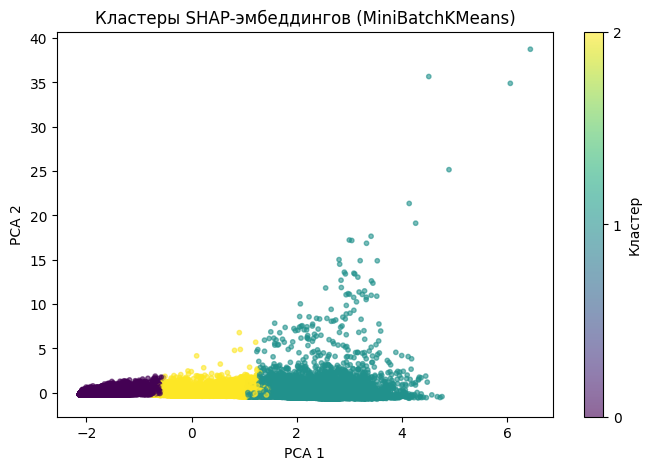

In [ ]:
pca = PCA(n_components=2, random_state=42)
shap_2d = pca.fit_transform(shap_embeddings)

plt.figure(figsize=(8,5))
scatter = plt.scatter(shap_2d[:,0], shap_2d[:,1], c=kmeans_labels, s=10, alpha=0.6)
plt.title("Кластеры SHAP-эмбеддингов (MiniBatchKMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, ticks=range(3), label='Кластер')
plt.show()

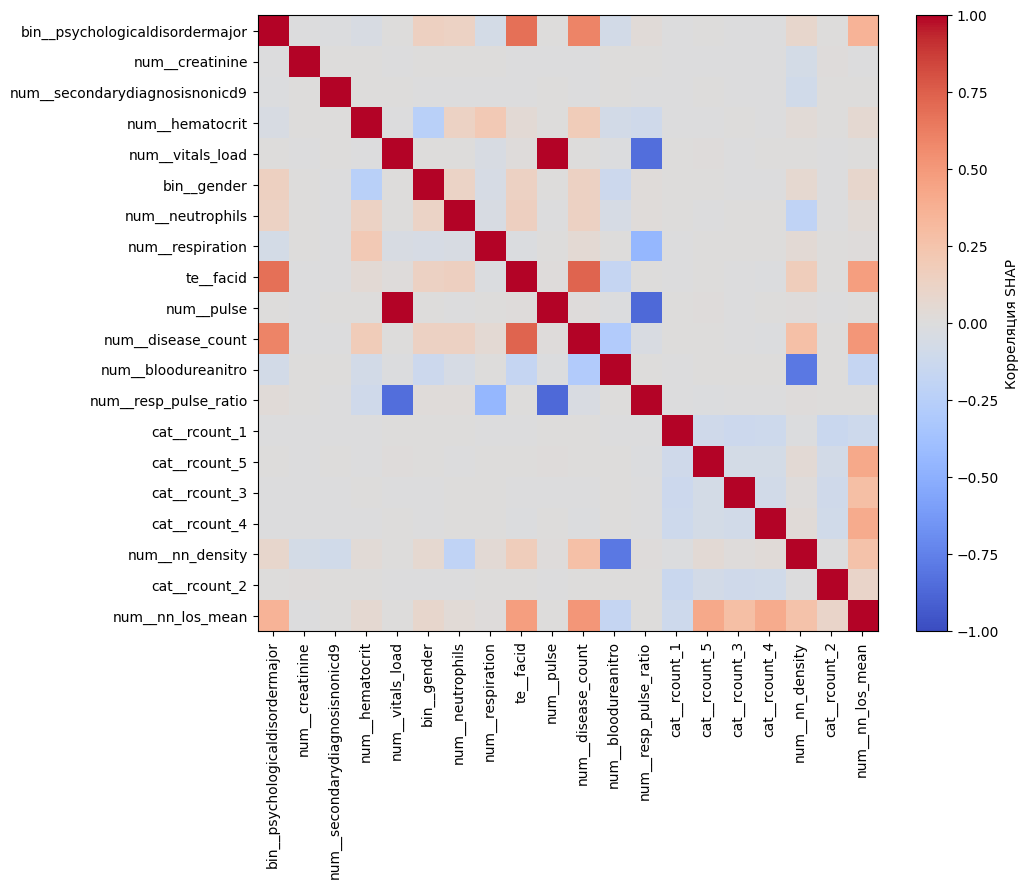

In [ ]:
top_idx = np.argsort(np.abs(shap_embeddings).mean(axis=0))[-20:]
shap_corr_top = shap_corr[np.ix_(top_idx, top_idx)]
top_features = feature_names[top_idx]

plt.figure(figsize=(10,8))
plt.imshow(shap_corr_top, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
plt.colorbar(label='Корреляция SHAP')
plt.xticks(ticks=np.arange(len(top_features)), labels=top_features, rotation=90)
plt.yticks(ticks=np.arange(len(top_features)), labels=top_features)
plt.show()


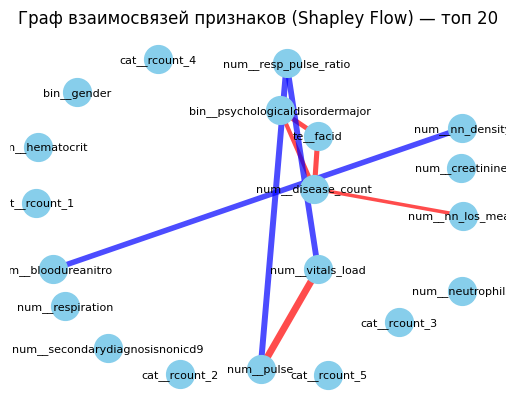

In [ ]:
threshold = 0.5

mean_abs_shap = np.mean(np.abs(shap_embeddings), axis=0)
top_n = 20
top_idx = np.argsort(mean_abs_shap)[-top_n:]

G = nx.Graph()
for i in top_idx:
    G.add_node(i, label=feature_names[i])

for i in top_idx:
    for j in top_idx:
        if i < j:
            corr_val = shap_corr[i, j]
            if abs(corr_val) >= threshold:
                G.add_edge(i, j, weight=corr_val)

pos = nx.spring_layout(G, seed=42, k=0.8)

nx.draw_networkx_nodes(G, pos, node_size=400, node_color='skyblue')

edges = G.edges(data=True)
colors = ['red' if d['weight']>0 else 'blue' for (u,v,d) in edges]
weights = [abs(d['weight'])*5 for (u,v,d) in edges]
nx.draw_networkx_edges(G, pos, width=weights, edge_color=colors, alpha=0.7)

labels = {i: feature_names[i] for i in top_idx}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("Граф взаимосвязей признаков (Shapley Flow) — топ 20")
plt.axis('off')
plt.show()


In [ ]:
shap_norm = np.linalg.norm(shap_embeddings, axis=1)

cluster_stats = pd.DataFrame({
    "cluster": kmeans_labels,
    "shap_norm": shap_norm
})
cluster_stats.groupby("cluster")["shap_norm"].describe()

count      mean       std       min       25%       50%       75%  \
cluster                                                                        
0        30806.0  1.753133  0.328837  0.756329  1.533208  1.804154  2.026253   
1        18018.0  2.559160  1.017074  1.282470  1.960778  2.439176  3.023929   
2        31176.0  0.867418  0.424362  0.266706  0.480077  0.754117  1.250983   

               max  
cluster             
0         2.285624  
1        40.074809  
2         6.939096

**Структура кластеров и кандидаты на сдвиги получаются идейно такими же**

In [ ]:
kmeans_full = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=1024)
kmeans_labels_full = kmeans_full.fit_predict(shap_embeddings)

X_train_full = X_train_lime.copy()
X_train_full["shap_cluster"] = kmeans_labels_full

X_test_full = X_test_lime.copy()
X_test_full["shap_cluster"] = -1



In [ ]:
from sklearn.base import clone
lasso_pipe_full = clone(lasso_pipe)
lasso_pipe_full.fit(X_train_full, y_train)

y_pred_full = lasso_pipe_full.predict(X_test_full)
mse_full = mean_squared_error(y_test, y_pred_full)
print("MSE на полном датасете с SHAP-кластерами:", mse_full)

MSE на полном датасете с SHAP-кластерами: 0.8110307894474219


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.589e+02, tolerance: 4.474e+01
  model = cd_fast.enet_coordinate_descent(


**Вывод по шагам 2 и 3:**


**После выполнения всех пунктов в 3 этапе мы поняли, что Shap-эмбэддинги очень хорошо объясняют исходные признаки и уменьшают ошибку, а также то что признаки с аномальной shap-нормой не являются выбросами и их удаление не изменяет разбиние на кластеры и не улучшает качество модели. Кроме этого мы также заметили, что данные хорошо разбиваются на 3 кластера по shap значениям**